In [4]:
setwd("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog")
### ADITYA KUMAR ROY ###
### HOUSE-PRICE PREDICTION MODEL ###

In [8]:
## Loading Libraries
library(readr)
library(ggplot2)
library(car)
library(caret)
library(dplyr)
library(BSDA)
library(pROC)
library(tidyverse)
library(grid)
library(gridExtra)
library(tidyr)
library(outliers)
library(corrplot)
library(GGally)
library(glmnet)
library(Matrix)
library(lubridate)

In [52]:
## Loading Datasets
AmesHousing <- read_csv("AmesHousing.csv")
head(AmesHousing)
colnames(AmesHousing)
str(AmesHousing)

Rows: 2930 Columns: 82
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (45): PID, MS SubClass, MS Zoning, Street, Alley, Lot Shape, Land Contou...
dbl (37): Order, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Bu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


[1] "Order"           "PID"             "MS SubClass"     "MS Zoning"      
 [5] "Lot Frontage"    "Lot Area"        "Street"          "Alley"          
 [9] "Lot Shape"       "Land Contour"    "Utilities"       "Lot Config"     
[13] "Land Slope"      "Neighborhood"    "Condition 1"     "Condition 2"    
[17] "Bldg Type"       "House Style"     "Overall Qual"    "Overall Cond"   
[21] "Year Built"      "Year Remod/Add"  "Roof Style"      "Roof Matl"      
[25] "Exterior 1st"    "Exterior 2nd"    "Mas Vnr Type"    "Mas Vnr Area"   
[29] "Exter Qual"      "Exter Cond"      "Foundation"      "Bsmt Qual"      
[33] "Bsmt Cond"       "Bsmt Exposure"   "BsmtFin Type 1"  "BsmtFin SF 1"   
[37] "BsmtFin Type 2"  "BsmtFin SF 2"    "Bsmt Unf SF"     "Total Bsmt SF"  
[41] "Heating"         "Heating QC"      "Central Air"     "Electrical"     
[45] "1st Flr SF"      "2nd Flr SF"      "Low Qual Fin SF" "Gr Liv Area"    
[49] "Bsmt Full Bath"  "Bsmt Half Bath"  "Full Bath"       "Half Bath"      
[53] "Bedroom AbvGr"   "Kitchen AbvGr"   "Kitchen Qual"    "TotRms AbvGrd"  
[57] "Functional"      "Fireplaces"      "Fireplace Qu"    "Garage Type"    
[61] "Garage Yr Blt"   "Garage Finish"   "Garage Cars"     "Garage Area"    
[65] "Garage Qual"     "Garage Cond"     "Paved Drive"     "Wood Deck SF"   
[69] "Open Porch SF"   "Enclosed Porch"  "3Ssn Porch"      "Screen Porch"   
[73] "Pool Area"       "Pool QC"         "Fence"           "Misc Feature"   
[77] "Misc Val"        "Mo Sold"         "Yr Sold"         "Sale Type"      
[81] "Sale Condition"  "SalePrice"

spc_tbl_ [2,930 × 82] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Order          : num [1:2930] 1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : chr [1:2930] "0526301100" "0526350040" "0526351010" "0526353030" ...
 $ MS SubClass    : chr [1:2930] "020" "020" "020" "020" ...
 $ MS Zoning      : chr [1:2930] "RL" "RH" "RL" "RL" ...
 $ Lot Frontage   : num [1:2930] 141 80 81 93 74 78 41 43 39 60 ...
 $ Lot Area       : num [1:2930] 31770 11622 14267 11160 13830 ...
 $ Street         : chr [1:2930] "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr [1:2930] NA NA NA NA ...
 $ Lot Shape      : chr [1:2930] "IR1" "Reg" "IR1" "Reg" ...
 $ Land Contour   : chr [1:2930] "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr [1:2930] "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot Config     : chr [1:2930] "Corner" "Inside" "Corner" "Corner" ...
 $ Land Slope     : chr [1:2930] "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr [1:2930] "NAmes" "NAmes" "NAmes" "NAmes" ...
 $ Condition 1    : chr [1

## Data Preprocessing

In [50]:
dim(AmesHousing)

#converting data types in correct form 
AmesHousing$`Year Built` <- as.Date(paste(AmesHousing$`Year Built`,
                                          "01", "01", sep = "-"))
AmesHousing$`Year Remod/Add` <- as.Date(paste(AmesHousing$`Year Remod/Add`,
                                          "01", "01", sep = "-"))
AmesHousing$`Garage Yr Blt` <- as.Date(paste(AmesHousing$`Garage Yr Blt`,
                                          "01", "01", sep = "-"))
AmesHousing$`Yr Sold` <- as.Date(paste(AmesHousing$`Yr Sold`,
                                          "01", "01", sep = "-"))
colnames(AmesHousing) <- gsub(" ", "_", colnames(AmesHousing))


[1] 2903   78

In [54]:
# Data Cleaning #

#checking for duplicate entries
unique(AmesHousing)

#checking for missing values
sum(is.na(AmesHousing))
sort(colSums(is.na(AmesHousing)))
sort(colSums(is.na(AmesHousing))/dim(AmesHousing)[1])
#replacing NA observations in Character variables
NA_chr_columns <- AmesHousing |> select(`Pool QC`,`Misc Feature`,Alley,Fence,`Fireplace Qu`,
                                        `Garage Cond`,`Garage Qual`,`Garage Finish`,`Garage Type`,
                                        `Bsmt Exposure`,`BsmtFin Type 1`,`BsmtFin Type 2`,`Bsmt Cond`,
                                        `Bsmt Qual`)
for (var in colnames(NA_chr_columns)) {
  print(var)
  # Checking pre-distribution
  print(table(AmesHousing[[var]])) 
  # Get the factor levels of the column
  factor_levels <- levels(as.factor(AmesHousing[[var]]))
  # Replace NA values with sampled factor levels
  AmesHousing[[var]][is.na(AmesHousing[[var]])] <- sample(factor_levels,
                                                          sum(is.na(AmesHousing[[var]])),
                                                          replace = TRUE)
  
  # Checking post-distribution
  print(table(AmesHousing[[var]]))
}
#replacing NA observation in Numeric variables
AmesHousing$`Lot Frontage`[is.na(AmesHousing$`Lot Frontage`)] <- mean(AmesHousing$`Lot Frontage`,
                                                                      na.rm = TRUE,replace = TRUE)
#replacing NA observation in Date type variables 
median_date <- as.Date(paste(median(AmesHousing$`Garage Yr Blt`, na.rm = TRUE),
                             "01", "01", sep = "-"))
AmesHousing$`Garage Yr Blt`[is.na(AmesHousing$`Garage Yr Blt`)] <- median_date

#final checking
AmesHousing <- na.omit(AmesHousing)
sum(is.na(AmesHousing))
unique(AmesHousing)
AmesHousing <- AmesHousing[,-c(1,2)]


Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,0527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,0527145080,120,RL,43,5005,Pave,NA,IR1,HLS,⋯,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,0527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,3,2010,WD,Normal,236500


[1] 13997

Order             PID     MS SubClass       MS Zoning        Lot Area 
              0               0               0               0               0 
         Street       Lot Shape    Land Contour       Utilities      Lot Config 
              0               0               0               0               0 
     Land Slope    Neighborhood     Condition 1     Condition 2       Bldg Type 
              0               0               0               0               0 
    House Style    Overall Qual    Overall Cond      Year Built  Year Remod/Add 
              0               0               0               0               0 
     Roof Style       Roof Matl    Exterior 1st    Exterior 2nd      Exter Qual 
              0               0               0               0               0 
     Exter Cond      Foundation         Heating      Heating QC     Central Air 
              0               0               0               0               0 
     1st Flr SF      2nd Flr SF Low Qual Fin SF     Gr Liv Area       Full Bath 
              0               0               0               0               0 
      Half Bath   Bedroom AbvGr   Kitchen AbvGr    Kitchen Qual   TotRms AbvGrd 
              0               0               0               0               0 
     Functional      Fireplaces     Paved Drive    Wood Deck SF   Open Porch SF 
              0               0               0               0               0 
 Enclosed Porch      3Ssn Porch    Screen Porch       Pool Area        Misc Val 
              0               0               0               0               0 
        Mo Sold         Yr Sold       Sale Type  Sale Condition       SalePrice 
              0               0               0               0               0 
   BsmtFin SF 1    BsmtFin SF 2     Bsmt Unf SF   Total Bsmt SF      Electrical 
              1               1               1               1               1 
    Garage Cars     Garage Area  Bsmt Full Bath  Bsmt Half Bath    Mas Vnr Type 
              1               1               2               2              23 
   Mas Vnr Area       Bsmt Qual       Bsmt Cond  BsmtFin Type 1  BsmtFin Type 2 
             23              80              80              80              81 
  Bsmt Exposure     Garage Type   Garage Yr Blt   Garage Finish     Garage Qual 
             83             157             159             159             159 
    Garage Cond    Lot Frontage    Fireplace Qu           Fence           Alley 
            159             490            1422            2358            2732 
   Misc Feature         Pool QC 
           2824            2917

Order             PID     MS SubClass       MS Zoning        Lot Area 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
         Street       Lot Shape    Land Contour       Utilities      Lot Config 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
     Land Slope    Neighborhood     Condition 1     Condition 2       Bldg Type 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
    House Style    Overall Qual    Overall Cond      Year Built  Year Remod/Add 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
     Roof Style       Roof Matl    Exterior 1st    Exterior 2nd      Exter Qual 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
     Exter Cond      Foundation         Heating      Heating QC     Central Air 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
     1st Flr SF      2nd Flr SF Low Qual Fin SF     Gr Liv Area       Full Bath 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
      Half Bath   Bedroom AbvGr   Kitchen AbvGr    Kitchen Qual   TotRms AbvGrd 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
     Functional      Fireplaces     Paved Drive    Wood Deck SF   Open Porch SF 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
 Enclosed Porch      3Ssn Porch    Screen Porch       Pool Area        Misc Val 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
        Mo Sold         Yr Sold       Sale Type  Sale Condition       SalePrice 
   0.0000000000    0.0000000000    0.0000000000    0.0000000000    0.0000000000 
   BsmtFin SF 1    BsmtFin SF 2     Bsmt Unf SF   Total Bsmt SF      Electrical 
   0.0003412969    0.0003412969    0.0003412969    0.0003412969    0.0003412969 
    Garage Cars     Garage Area  Bsmt Full Bath  Bsmt Half Bath    Mas Vnr Type 
   0.0003412969    0.0003412969    0.0006825939    0.0006825939    0.0078498294 
   Mas Vnr Area       Bsmt Qual       Bsmt Cond  BsmtFin Type 1  BsmtFin Type 2 
   0.0078498294    0.0273037543    0.0273037543    0.0273037543    0.0276450512 
  Bsmt Exposure     Garage Type   Garage Yr Blt   Garage Finish     Garage Qual 
   0.0283276451    0.0535836177    0.0542662116    0.0542662116    0.0542662116 
    Garage Cond    Lot Frontage    Fireplace Qu           Fence           Alley 
   0.0542662116    0.1672354949    0.4853242321    0.8047781570    0.9324232082 
   Misc Feature         Pool QC 
   0.9638225256    0.9955631399

[1] "Pool QC"

Ex Fa Gd TA 
 4  2  4  3 

 Ex  Fa  Gd  TA 
714 733 740 743 
[1] "Misc Feature"

Elev Gar2 Othr Shed TenC 
   1    5    4   95    1 

Elev Gar2 Othr Shed TenC 
 592  584  570  636  548 
[1] "Alley"

Grvl Pave 
 120   78 

Grvl Pave 
1469 1461 
[1] "Fence"

GdPrv  GdWo MnPrv  MnWw 
  118   112   330    12 

GdPrv  GdWo MnPrv  MnWw 
  699   749   893   589 
[1] "Fireplace Qu"

 Ex  Fa  Gd  Po  TA 
 43  75 744  46 600 

  Ex   Fa   Gd   Po   TA 
 327  358 1011  328  906 
[1] "Garage Cond"

  Ex   Fa   Gd   Po   TA 
   3   74   15   14 2665 

  Ex   Fa   Gd   Po   TA 
  44  114   47   37 2688 
[1] "Garage Qual"

  Ex   Fa   Gd   Po   TA 
   3  124   24    5 2615 

  Ex   Fa   Gd   Po   TA 
  44  154   58   39 2635 
[1] "Garage Finish"

 Fin  RFn  Unf 
 728  812 1231 

 Fin  RFn  Unf 
 778  864 1288 
[1] "Garage Type"

 2Types  Attchd Basment BuiltIn CarPort  Detchd 
     23    1731      36     186      15     782 

 2Types  Attchd Basment BuiltIn CarPort  Detchd 
     44    

[1] 0

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,0526301100,020,RL,141.00000,31770,Pave,Grvl,IR1,Lvl,⋯,0,TA,GdWo,Elev,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80.00000,11622,Pave,Pave,Reg,Lvl,⋯,0,TA,MnPrv,Othr,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81.00000,14267,Pave,Pave,IR1,Lvl,⋯,0,Gd,GdPrv,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93.00000,11160,Pave,Grvl,Reg,Lvl,⋯,0,Ex,GdPrv,Shed,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74.00000,13830,Pave,Pave,IR1,Lvl,⋯,0,TA,MnPrv,Elev,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78.00000,9978,Pave,Grvl,IR1,Lvl,⋯,0,Fa,MnPrv,Elev,0,6,2010,WD,Normal,195500
7,0527127150,120,RL,41.00000,4920,Pave,Grvl,Reg,Lvl,⋯,0,Fa,GdPrv,Gar2,0,4,2010,WD,Normal,213500
8,0527145080,120,RL,43.00000,5005,Pave,Grvl,IR1,HLS,⋯,0,Gd,MnWw,Elev,0,1,2010,WD,Normal,191500
9,0527146030,120,RL,39.00000,5389,Pave,Pave,IR1,Lvl,⋯,0,TA,GdPrv,TenC,0,3,2010,WD,Normal,236500


## Exploratory Data Analysis

In [56]:
summary(AmesHousing)

 MS SubClass         MS Zoning          Lot Frontage       Lot Area     
 Length:2903        Length:2903        Min.   : 21.00   Min.   :  1300  
 Class :character   Class :character   1st Qu.: 60.00   1st Qu.:  7424  
 Mode  :character   Mode  :character   Median : 69.22   Median :  9430  
                                       Mean   : 69.17   Mean   : 10131  
                                       3rd Qu.: 78.00   3rd Qu.: 11518  
                                       Max.   :313.00   Max.   :215245  
    Street             Alley            Lot Shape         Land Contour      
 Length:2903        Length:2903        Length:2903        Length:2903       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



	Shapiro-Wilk normality test

data:  AmesHousing$SalePrice
W = 0.87481, p-value < 2.2e-16


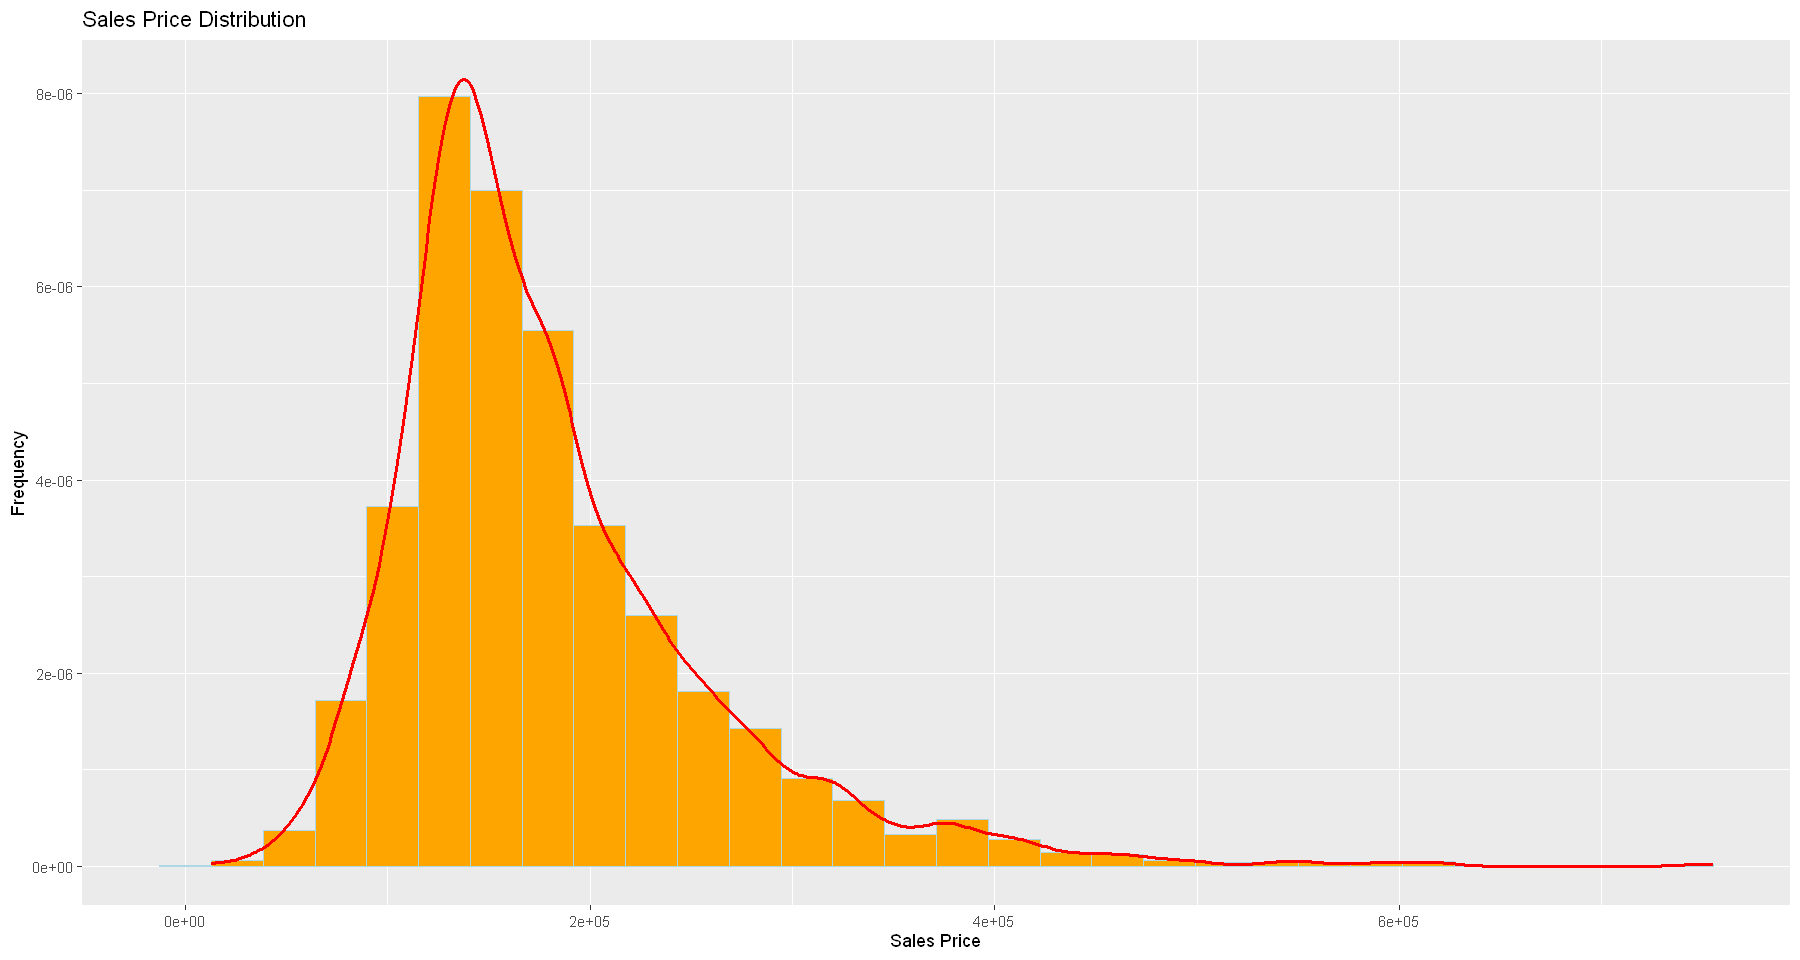

In [58]:
# visualizing Sales Price
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(AmesHousing,aes(x = SalePrice))+
  geom_histogram(aes(y = ..density..),col = "lightblue",fill = "orange")+
  geom_density(col = "red",size = 1)+
  labs(x= "Sales Price",y = "Frequency",
       title = "Sales Price Distribution")
#checking for normality
shapiro.test(AmesHousing$SalePrice) # not a normal distribution

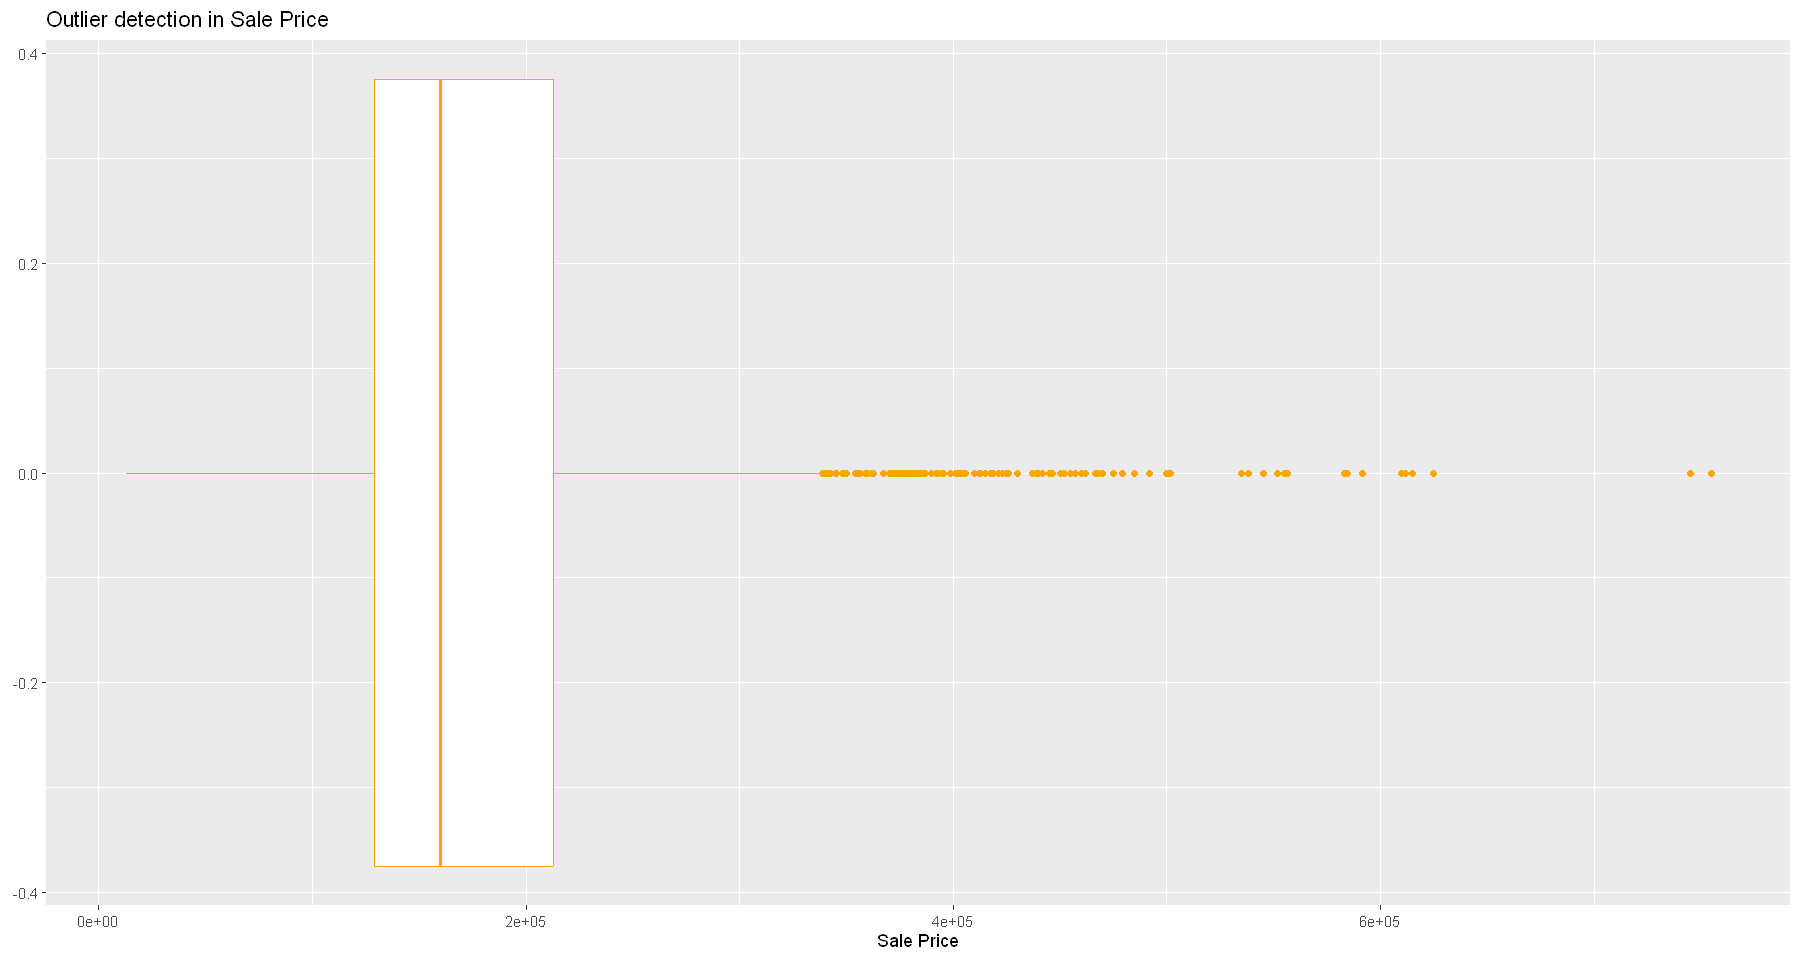

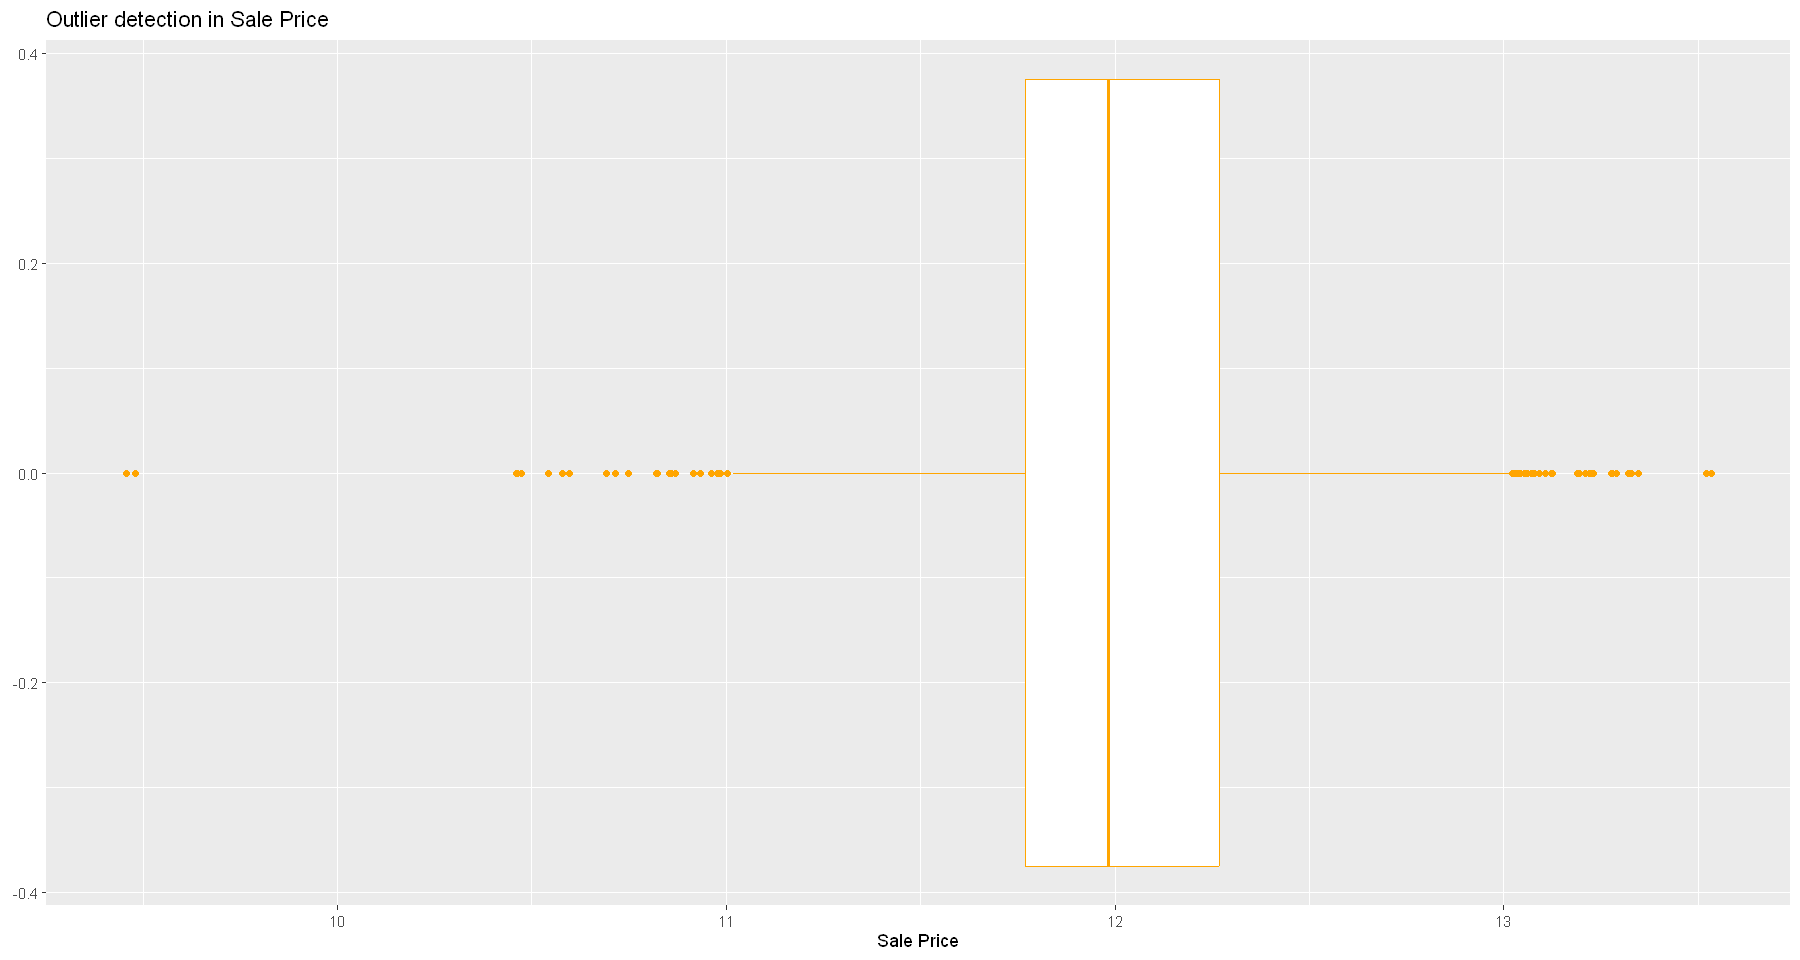

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


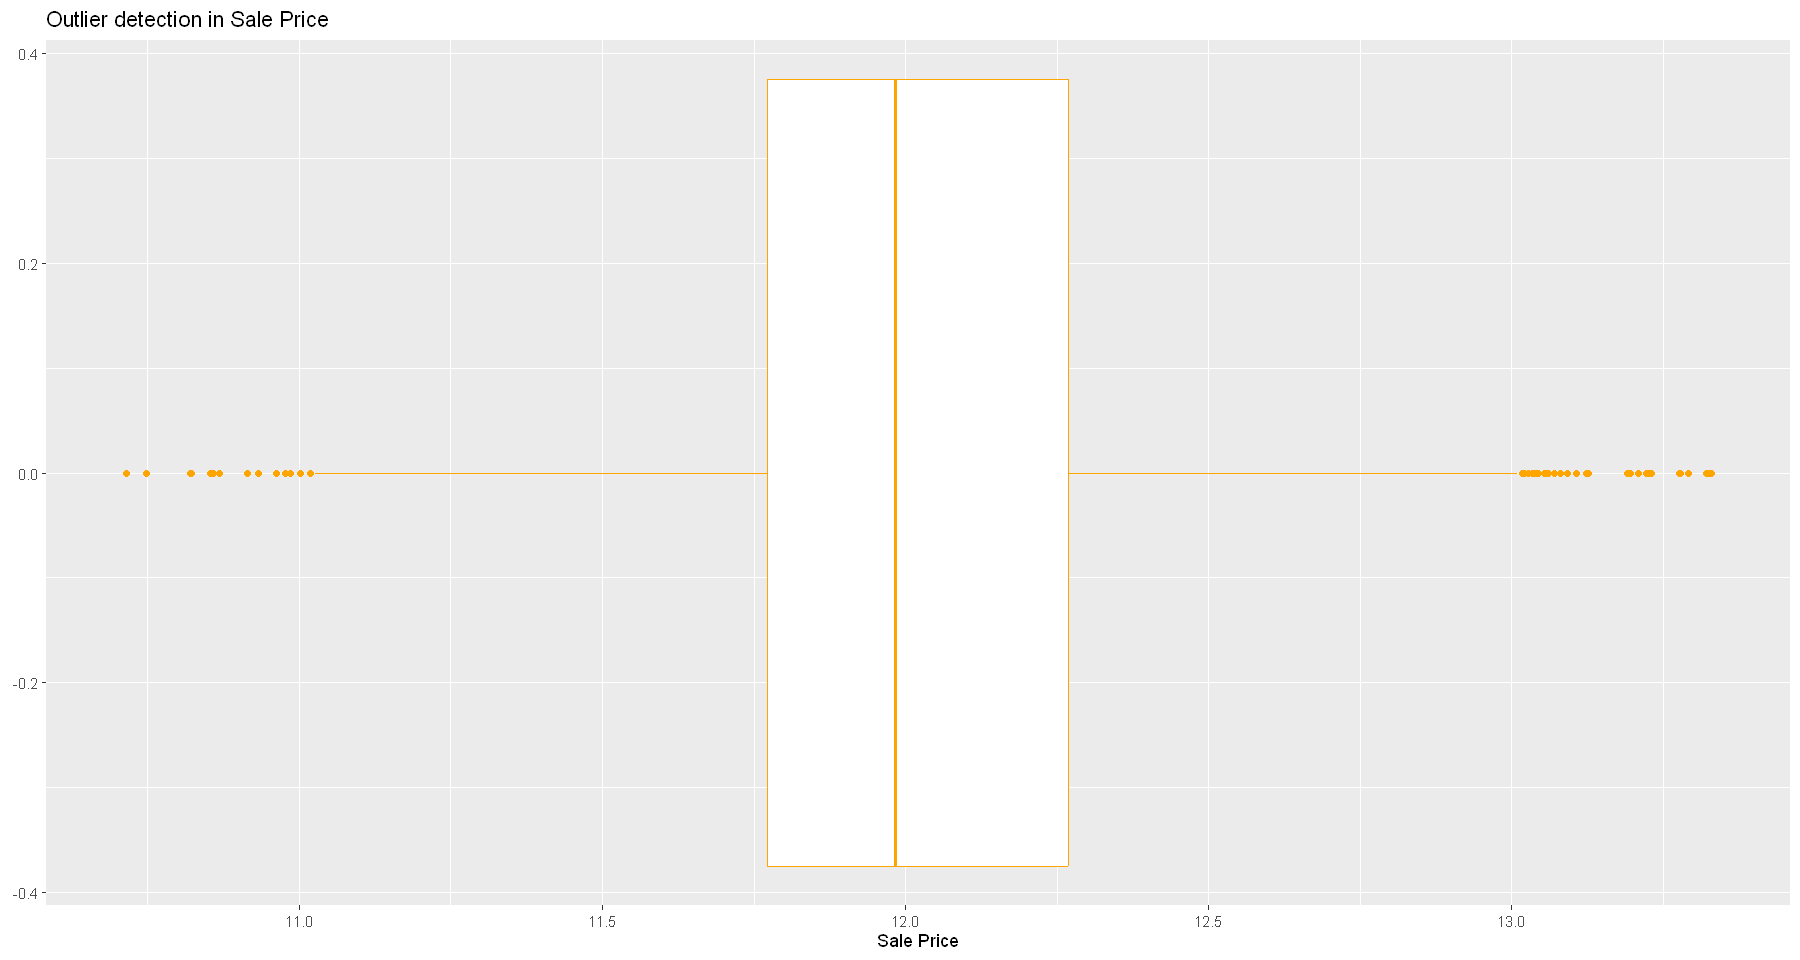

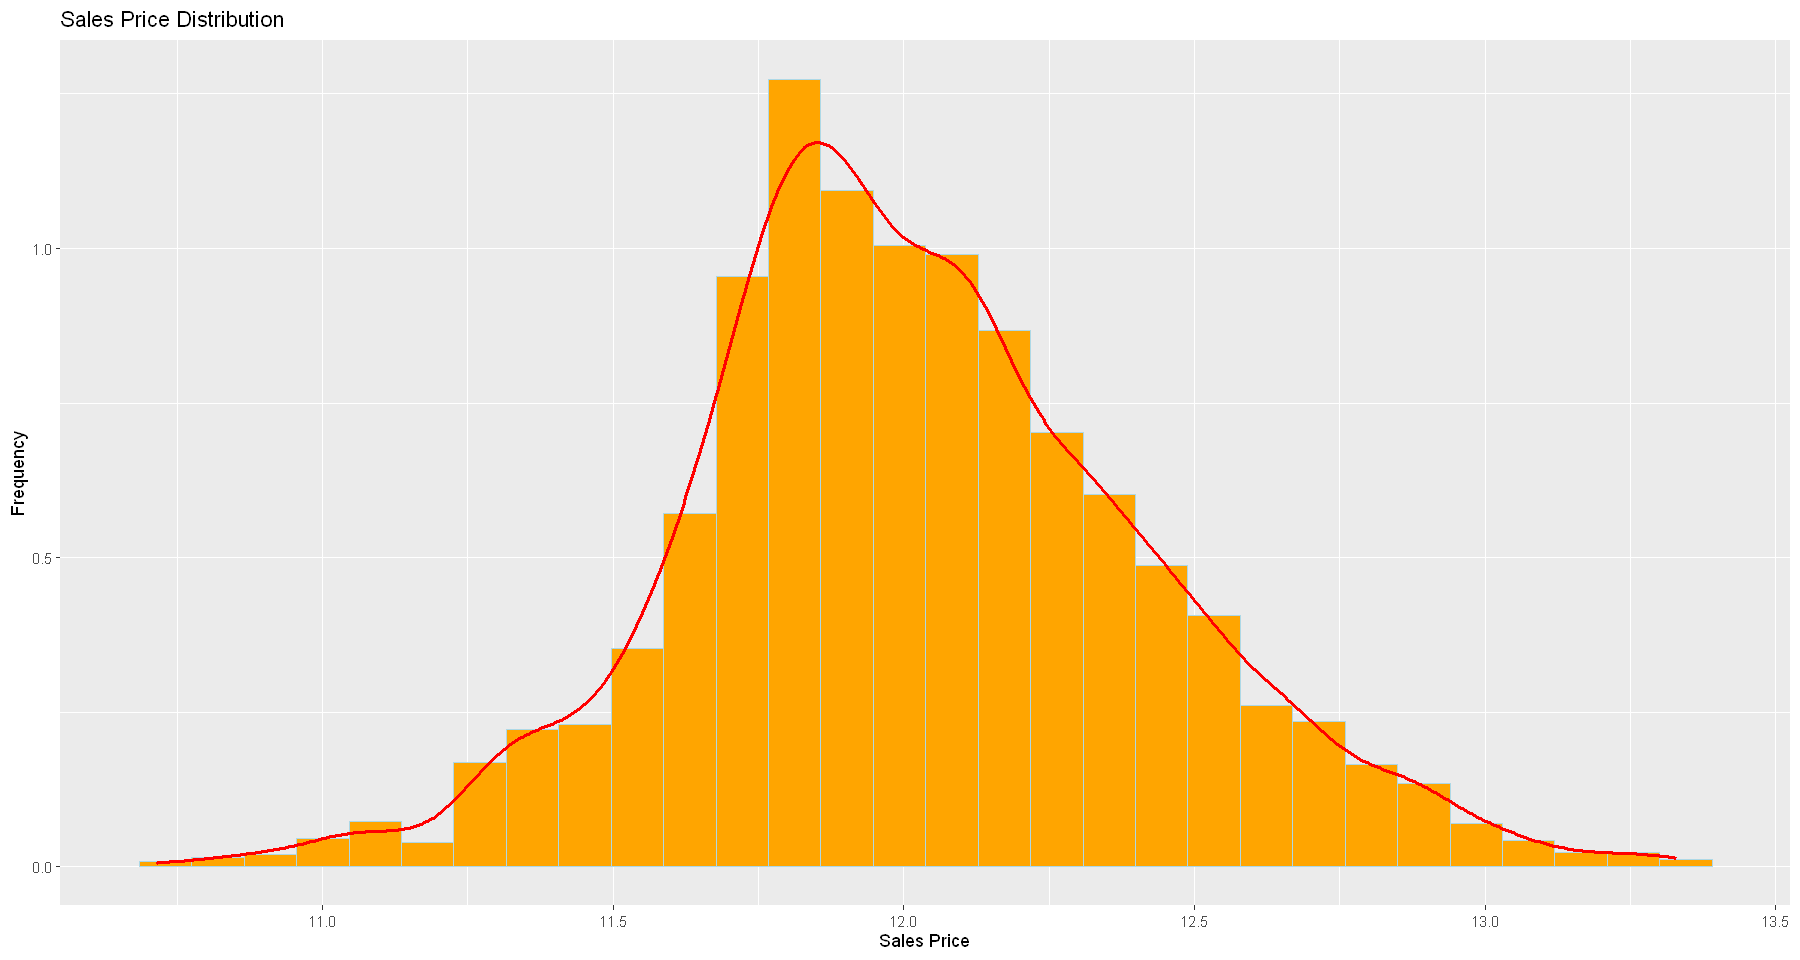

In [60]:
# Outlier detection and Removal
ggplot(AmesHousing,aes(x = SalePrice))+
  geom_boxplot(col = "orange")+
  labs(x = "Sale Price",title = "Outlier detection in Sale Price")

# log scaling the SalePrice for effiecient outlier handling.
AmesHousing$log_Scale <- log(AmesHousing$SalePrice)
ggplot(AmesHousing,aes(x = log_Scale))+
  geom_boxplot(col = "orange")+
  labs(x = "Sale Price",title = "Outlier detection in Sale Price")


iqr_result <- boxplot.stats(AmesHousing$log_Scale)$stats
lower_bound <- iqr_result[1] - 1.5 * (iqr_result[3] - iqr_result[2])
upper_bound <- iqr_result[5] + 1.5 * (iqr_result[3] - iqr_result[2])
AmesHousing_clean <- AmesHousing[AmesHousing$log_Scale >= lower_bound & AmesHousing$log_Scale <= upper_bound, ]
ggplot(AmesHousing_clean,aes(x = log_Scale))+
  geom_boxplot(col = "orange")+
  labs(x = "Sale Price",title = "Outlier detection in Sale Price")

ggplot(AmesHousing_clean,aes(x = log_Scale))+
  geom_histogram(aes(y = ..density..),col = "lightblue",fill = "orange")+
  geom_density(col = "red",size = 1)+
  labs(x= "Sales Price",y = "Frequency",
       title = "Sales Price Distribution")


                Lot Frontage     Lot Area Overall Qual Overall Cond
Lot Frontage     1.000000000  0.364535686   0.19935917 -0.068640142
Lot Area         0.364535686  1.000000000   0.09886648 -0.034598303
Overall Qual     0.199359171  0.098866481   1.00000000 -0.091357782
Overall Cond    -0.068640142 -0.034598303  -0.09135778  1.000000000
Year Built       0.115310484  0.024544719   0.59514636 -0.367248962
Year Remod/Add   0.085371904  0.021283006   0.56809136  0.051752907
Mas Vnr Area     0.205099521  0.128120647   0.42906419 -0.134976648
BsmtFin SF 1     0.203371770  0.192837842   0.28428205 -0.049545318
BsmtFin SF 2     0.040870892  0.084550752  -0.03971134  0.040408008
Bsmt Unf SF      0.107969377  0.025873823   0.26945152 -0.135608991
Total Bsmt SF    0.333798298  0.257858701   0.54747905 -0.170929605
1st Flr SF       0.424329034  0.323755065   0.48475198 -0.159208669
2nd Flr SF       0.026462624  0.034895949   0.24289417  0.006900075
Low Qual Fin SF  0.005302337  0.001040615  -0.04

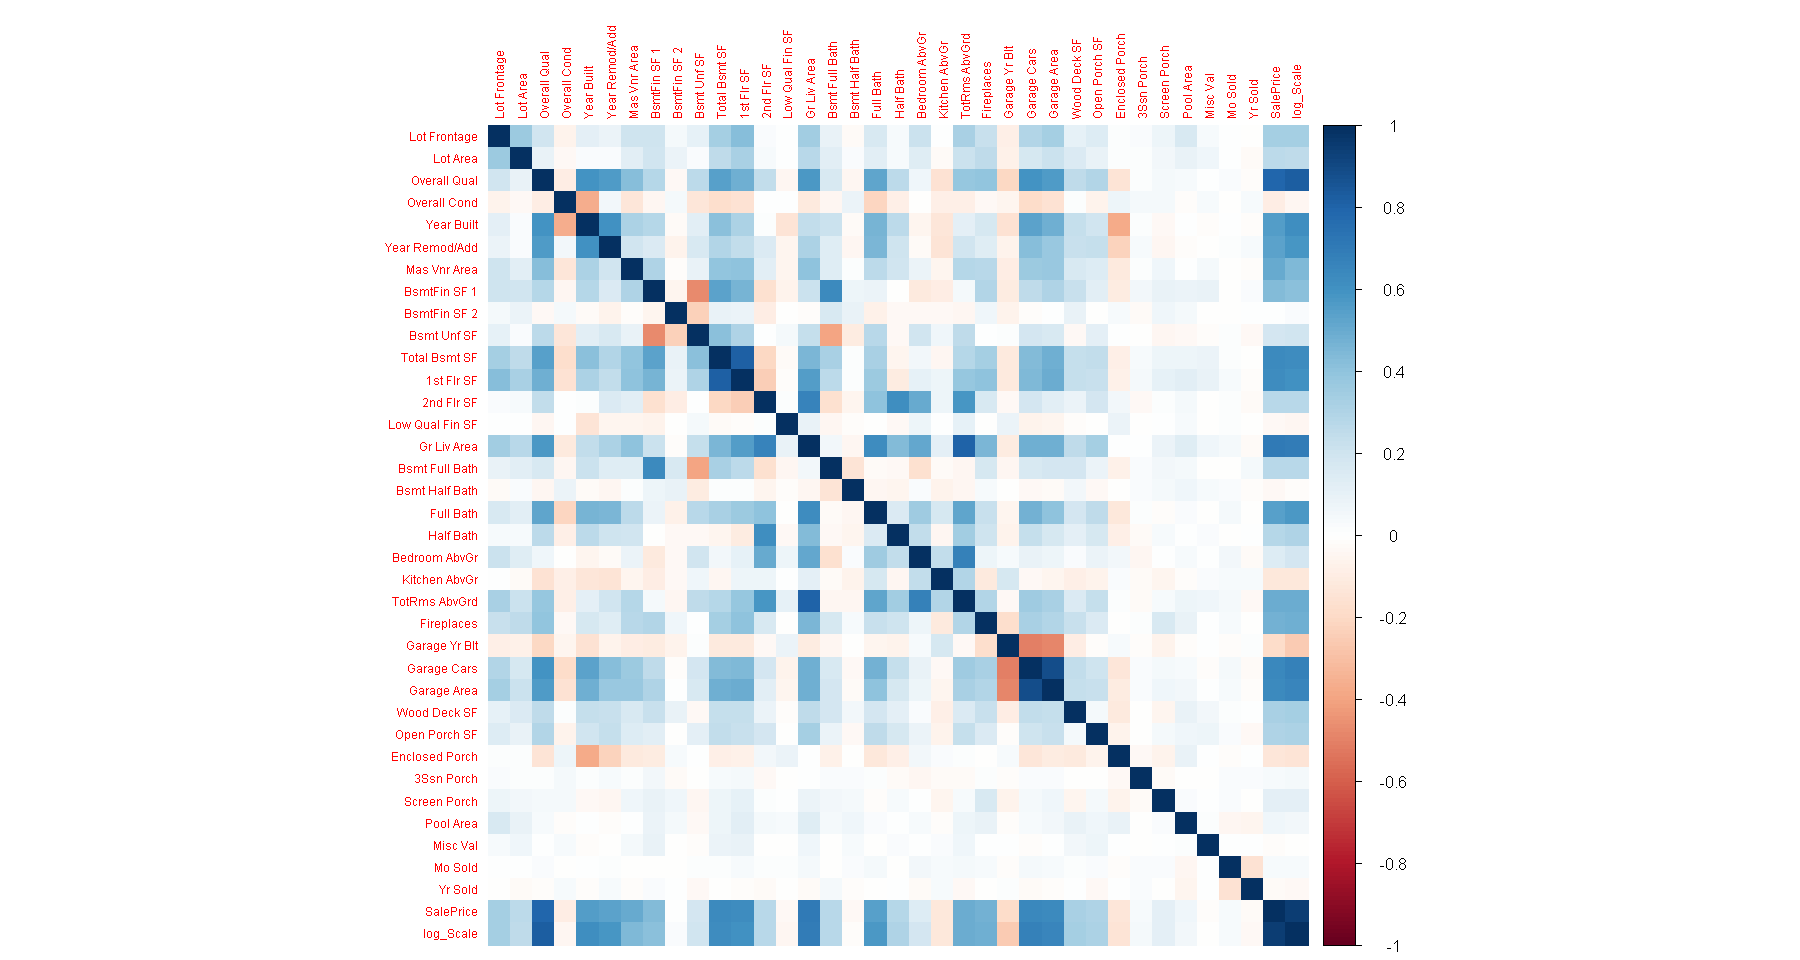

In [62]:
#visualizing the correlation plot
AmesHousing <- AmesHousing[,-c(1,2)]
numeric_cols <- AmesHousing %>% select(where(is.numeric))
cor_matrix <- cor(numeric_cols, use = "complete.obs")
print(cor_matrix)
corrplot(cor_matrix, method = "color", tl.cex = 0.6)

`geom_smooth()` using formula = 'y ~ x'


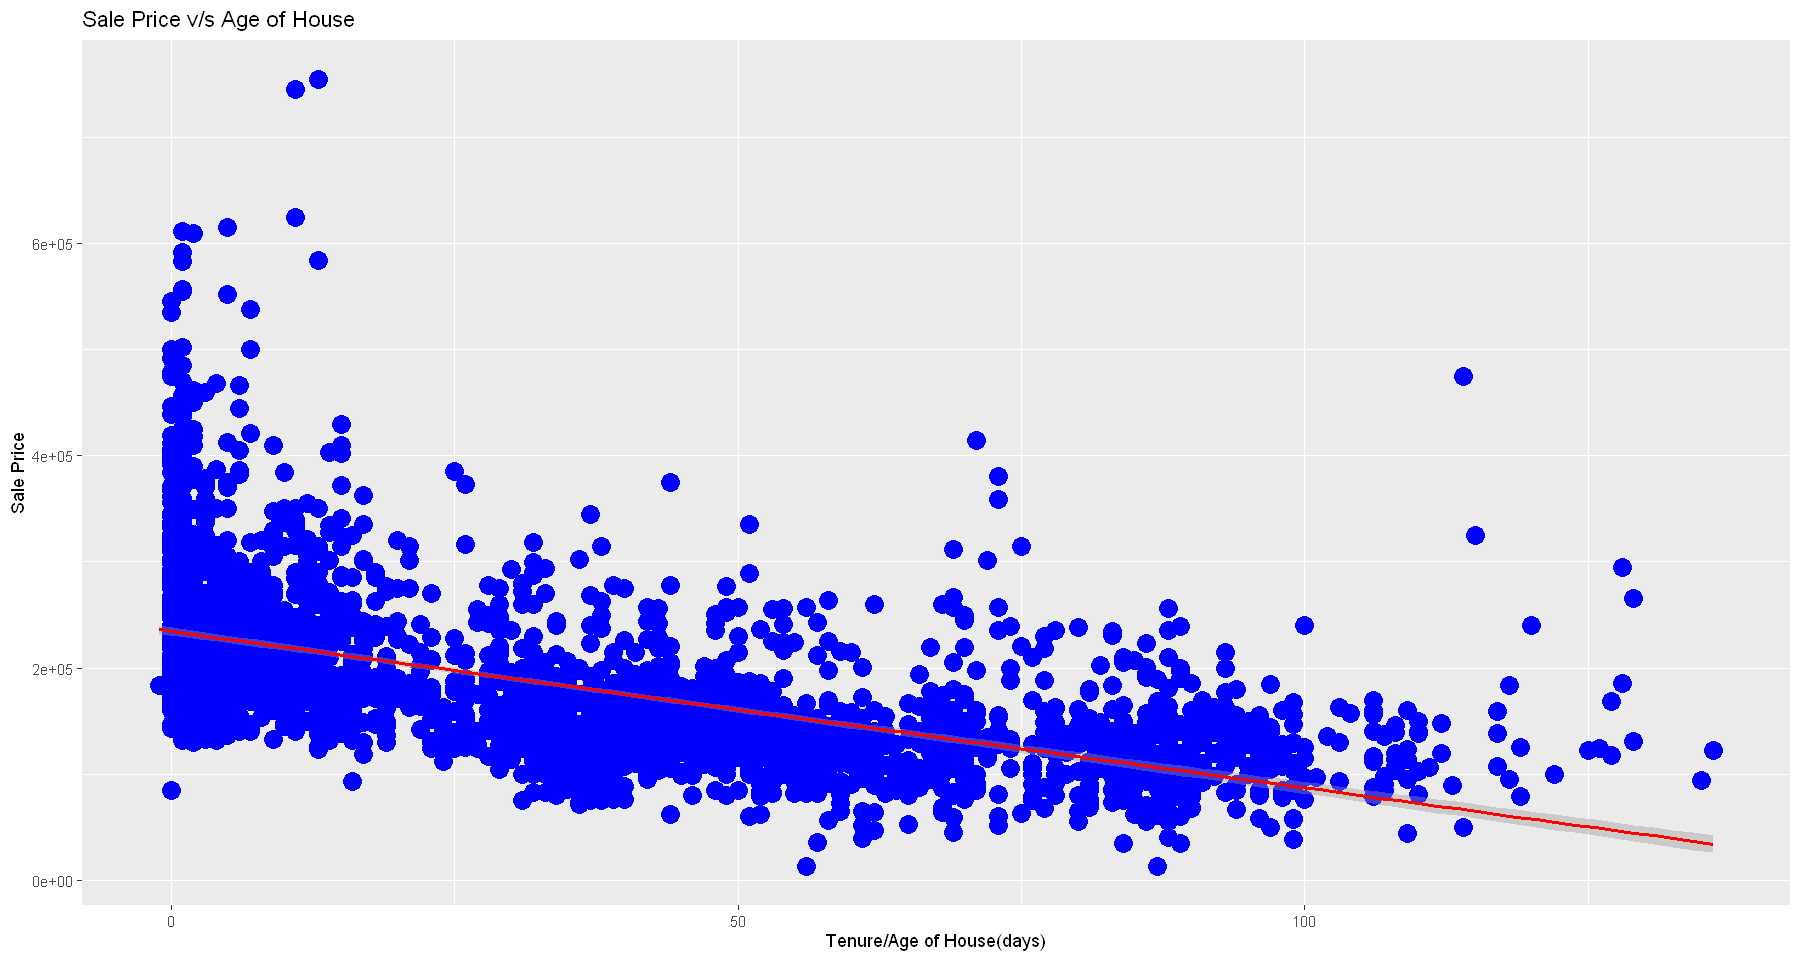

In [100]:
# relation between age and price
AmesHousing$Age <- AmesHousing$`Yr Sold` - AmesHousing$`Year Built`
ggplot(AmesHousing,aes(x = Age,y = SalePrice))+
  geom_point(color = "blue",size = 5)+
  geom_smooth(method = "lm",color = "red")+
  labs(x = "Tenure/Age of House(days)",y = "Sale Price",
       title = "Sale Price v/s Age of House")

`geom_smooth()` using formula = 'y ~ x'


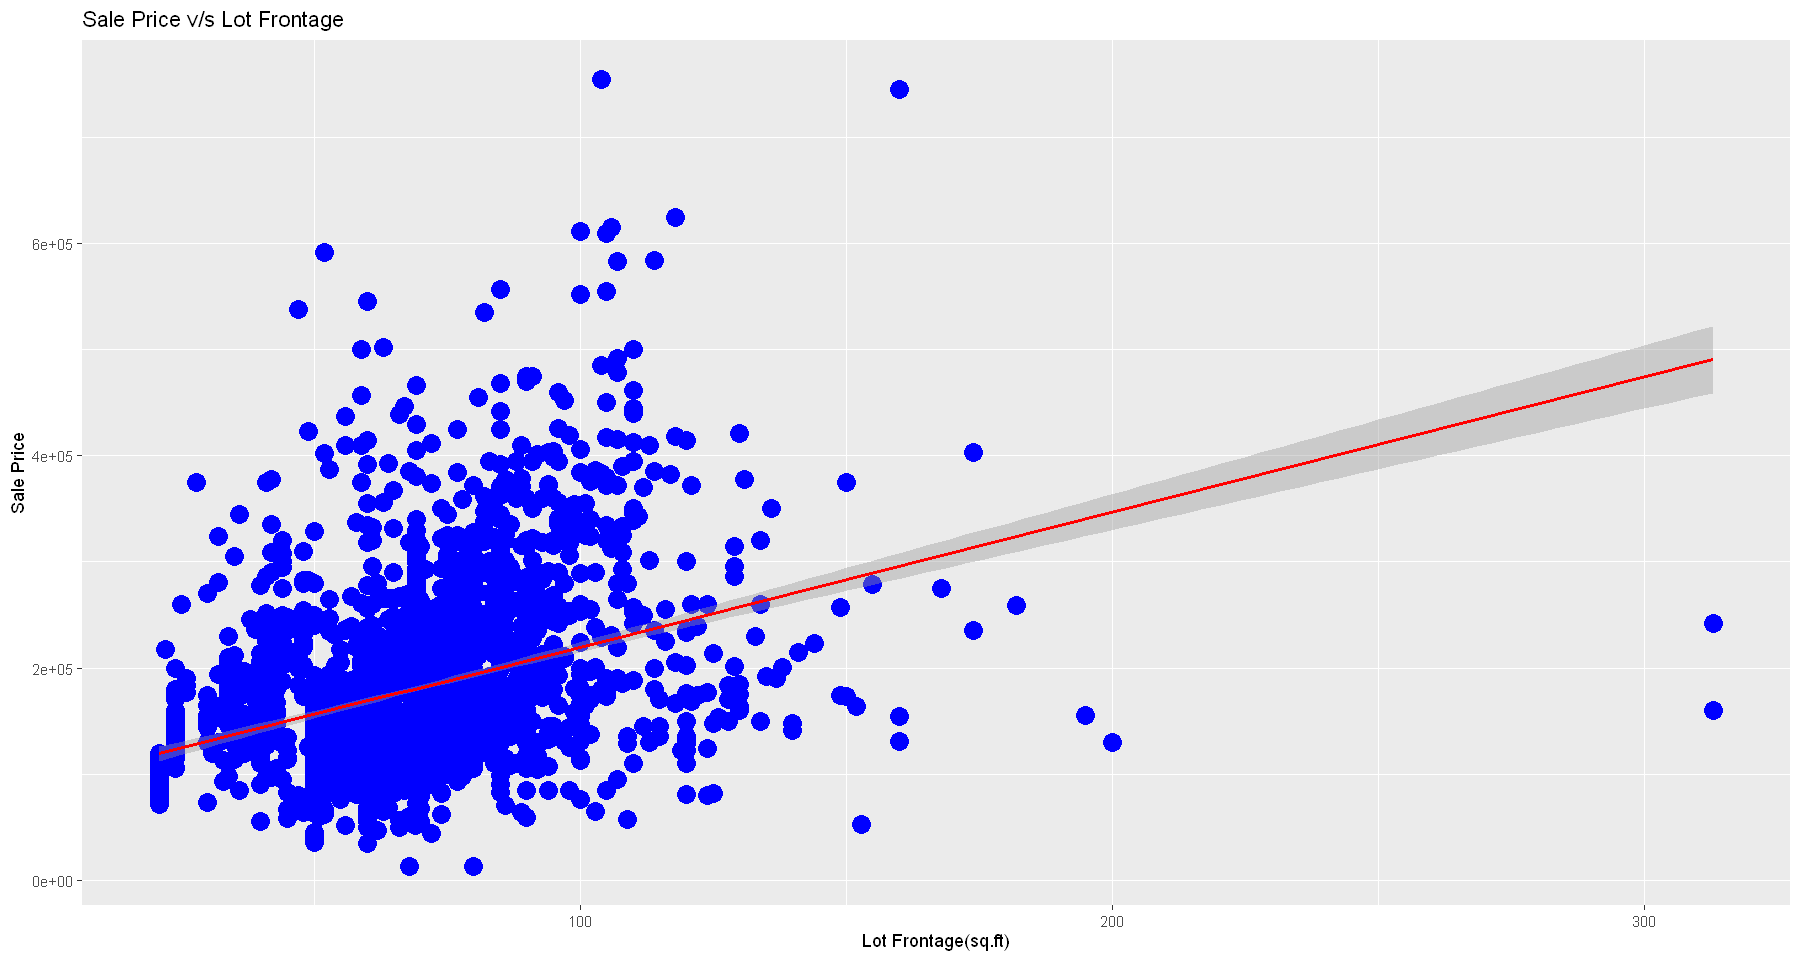

In [98]:
# relation between lot frontage and price
ggplot(AmesHousing,aes(x = `Lot Frontage`,y = SalePrice))+
  geom_point(color = "blue",size = 5)+
  geom_smooth(method = "lm",color = "red")+
  labs(x = "Lot Frontage(sq.ft)",y = "Sale Price",
       title = "Sale Price v/s Lot Frontage")

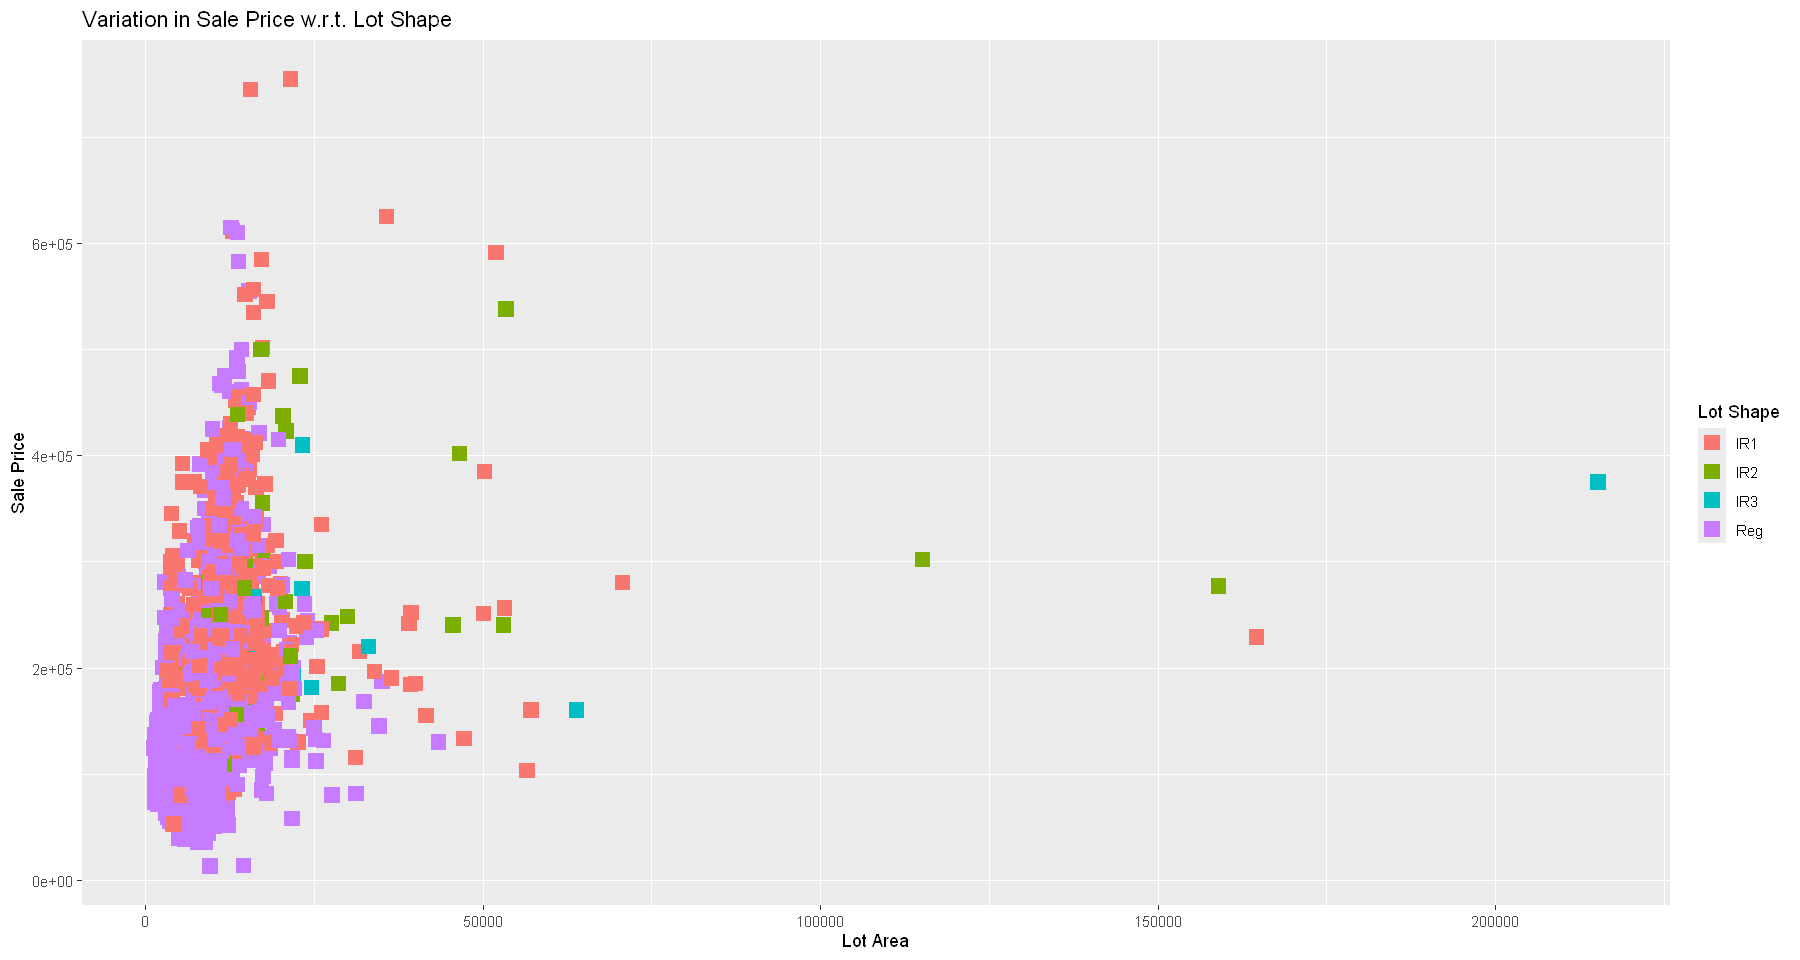

In [96]:
# how price varies with change in lot shape
ggplot(AmesHousing,aes(x = `Lot Area`,y = SalePrice,color = `Lot Shape`))+
  geom_point(pch = 15,size = 4 )+labs(x= "Lot Area",y = "Sale Price",
                    title = "Variation in Sale Price w.r.t. Lot Shape")

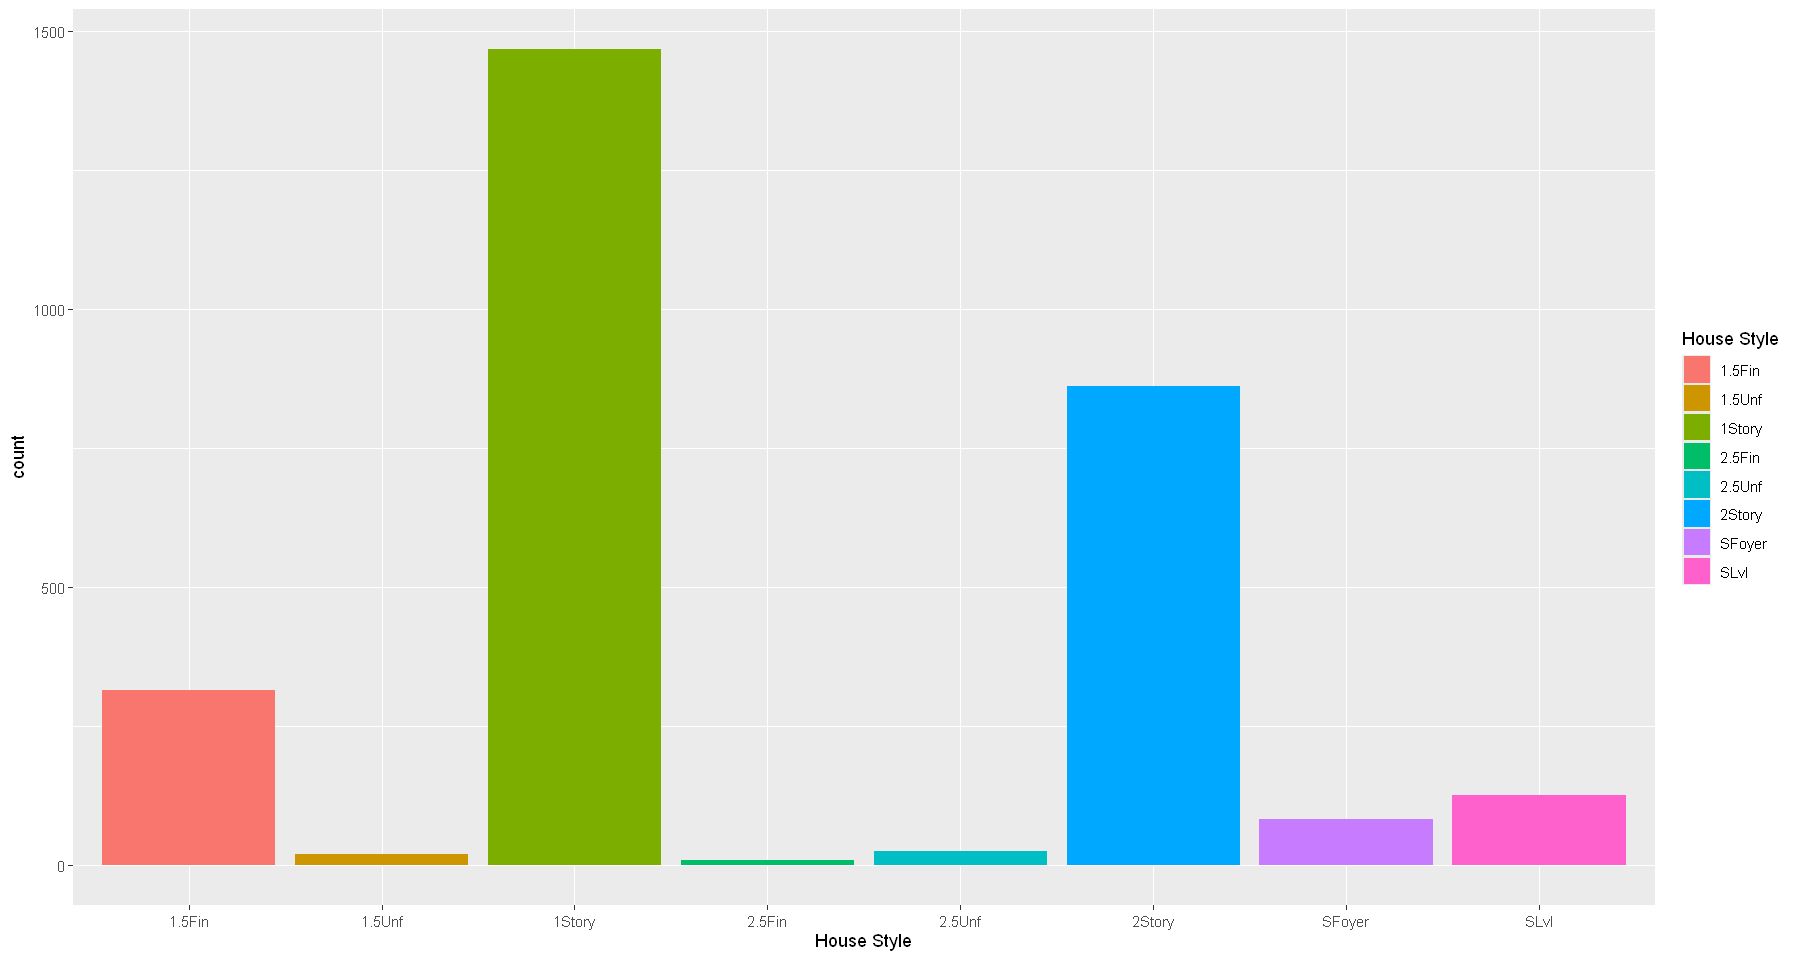

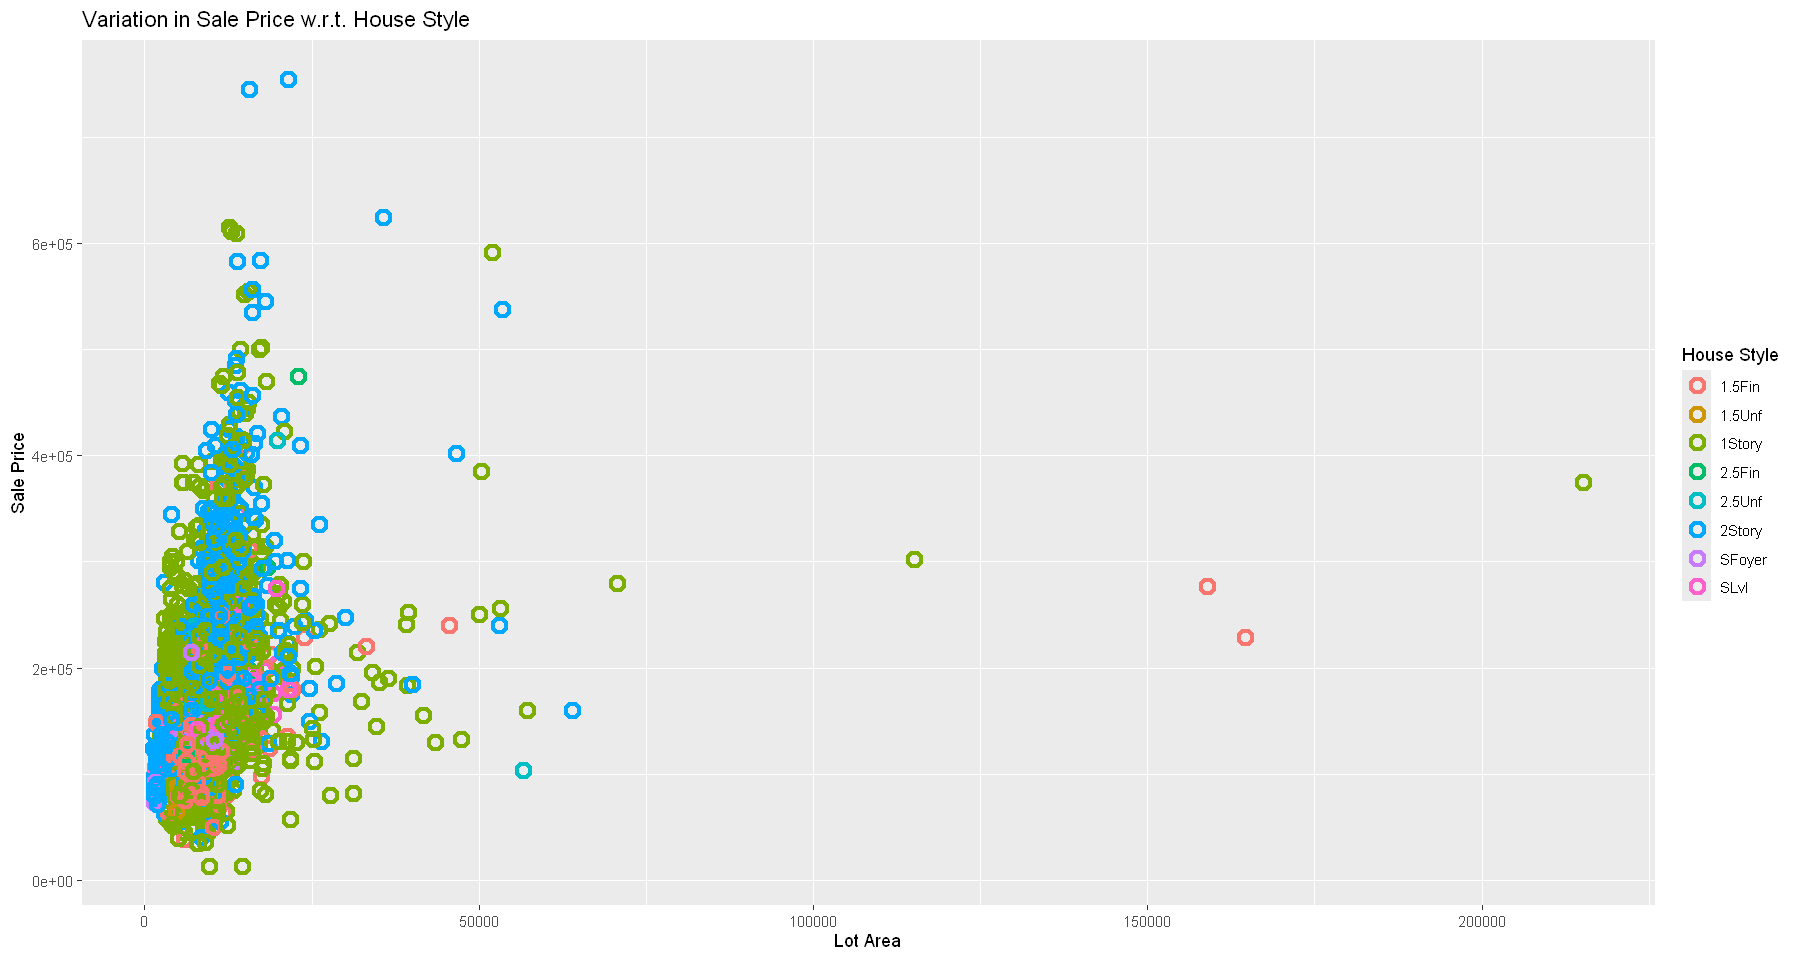

In [94]:
# price v/s house style
ggplot(AmesHousing,aes(x = `House Style`,fill = `House Style`))+
  geom_bar()

ggplot(AmesHousing,aes(x = `Lot Area`,y = SalePrice,color = `House Style`))+
  geom_point(size = 3, stroke = 2, shape = 21)+ labs(x= "Lot Area",y = "Sale Price",
                     title = "Variation in Sale Price w.r.t. House Style")

`geom_smooth()` using formula = 'y ~ x'


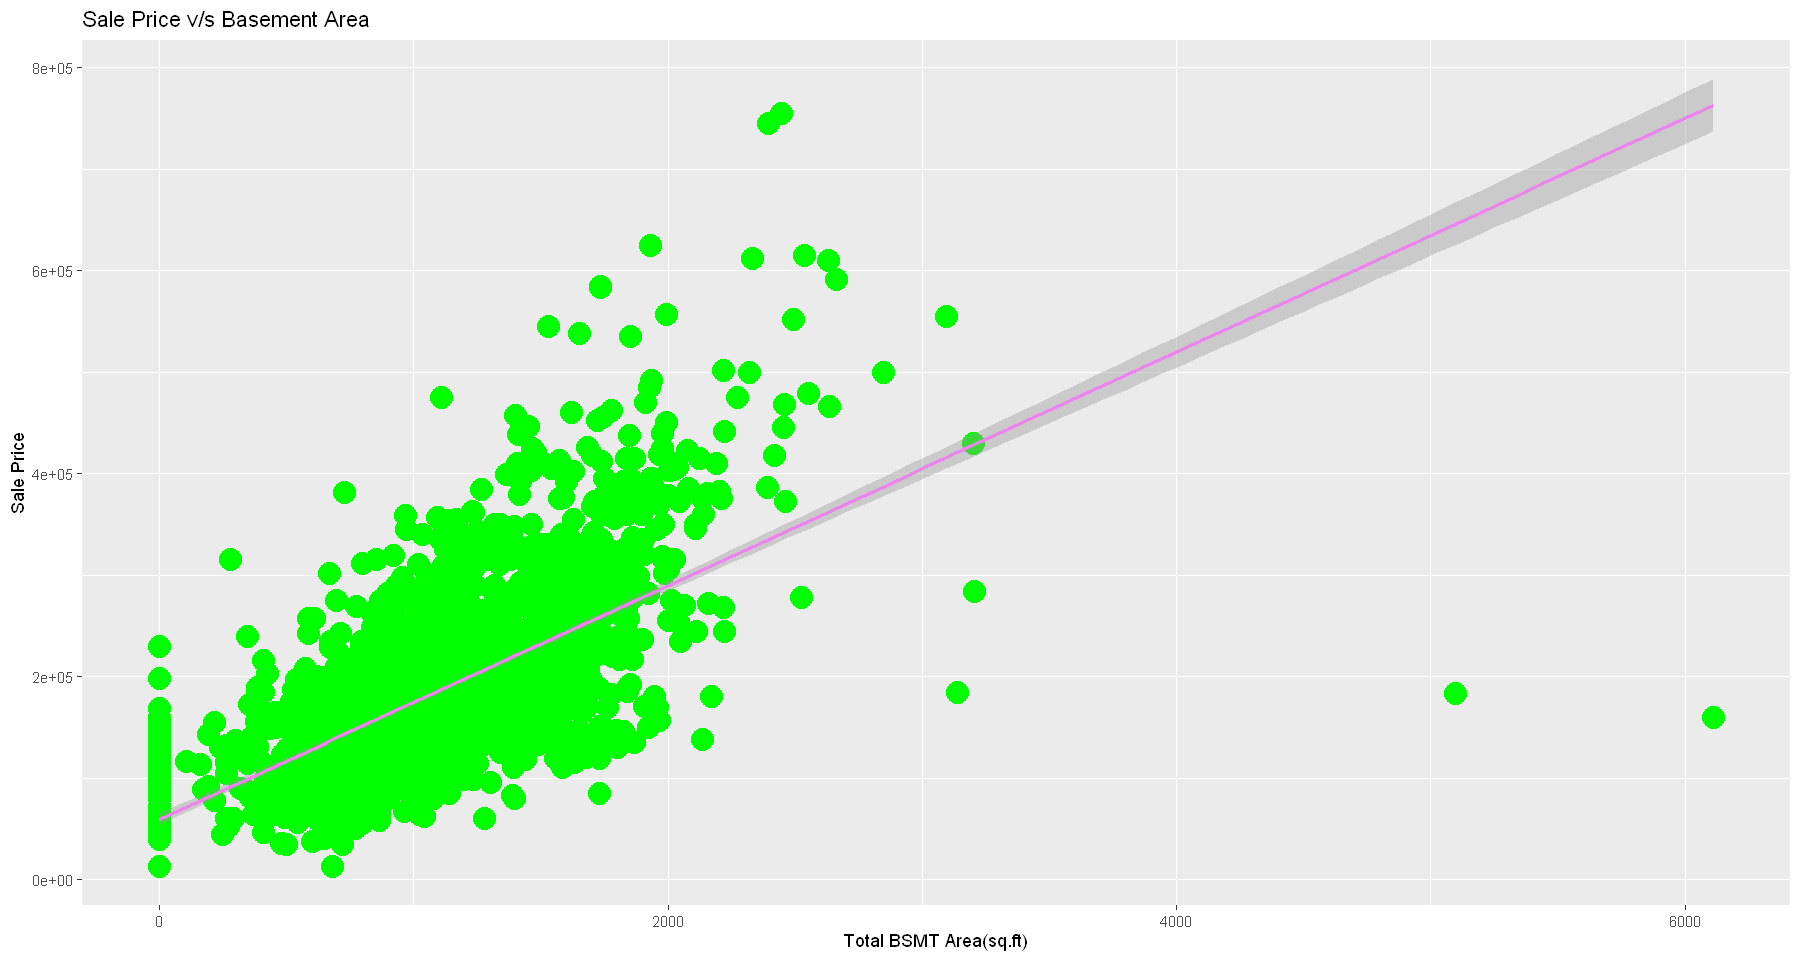

`geom_smooth()` using formula = 'y ~ x'


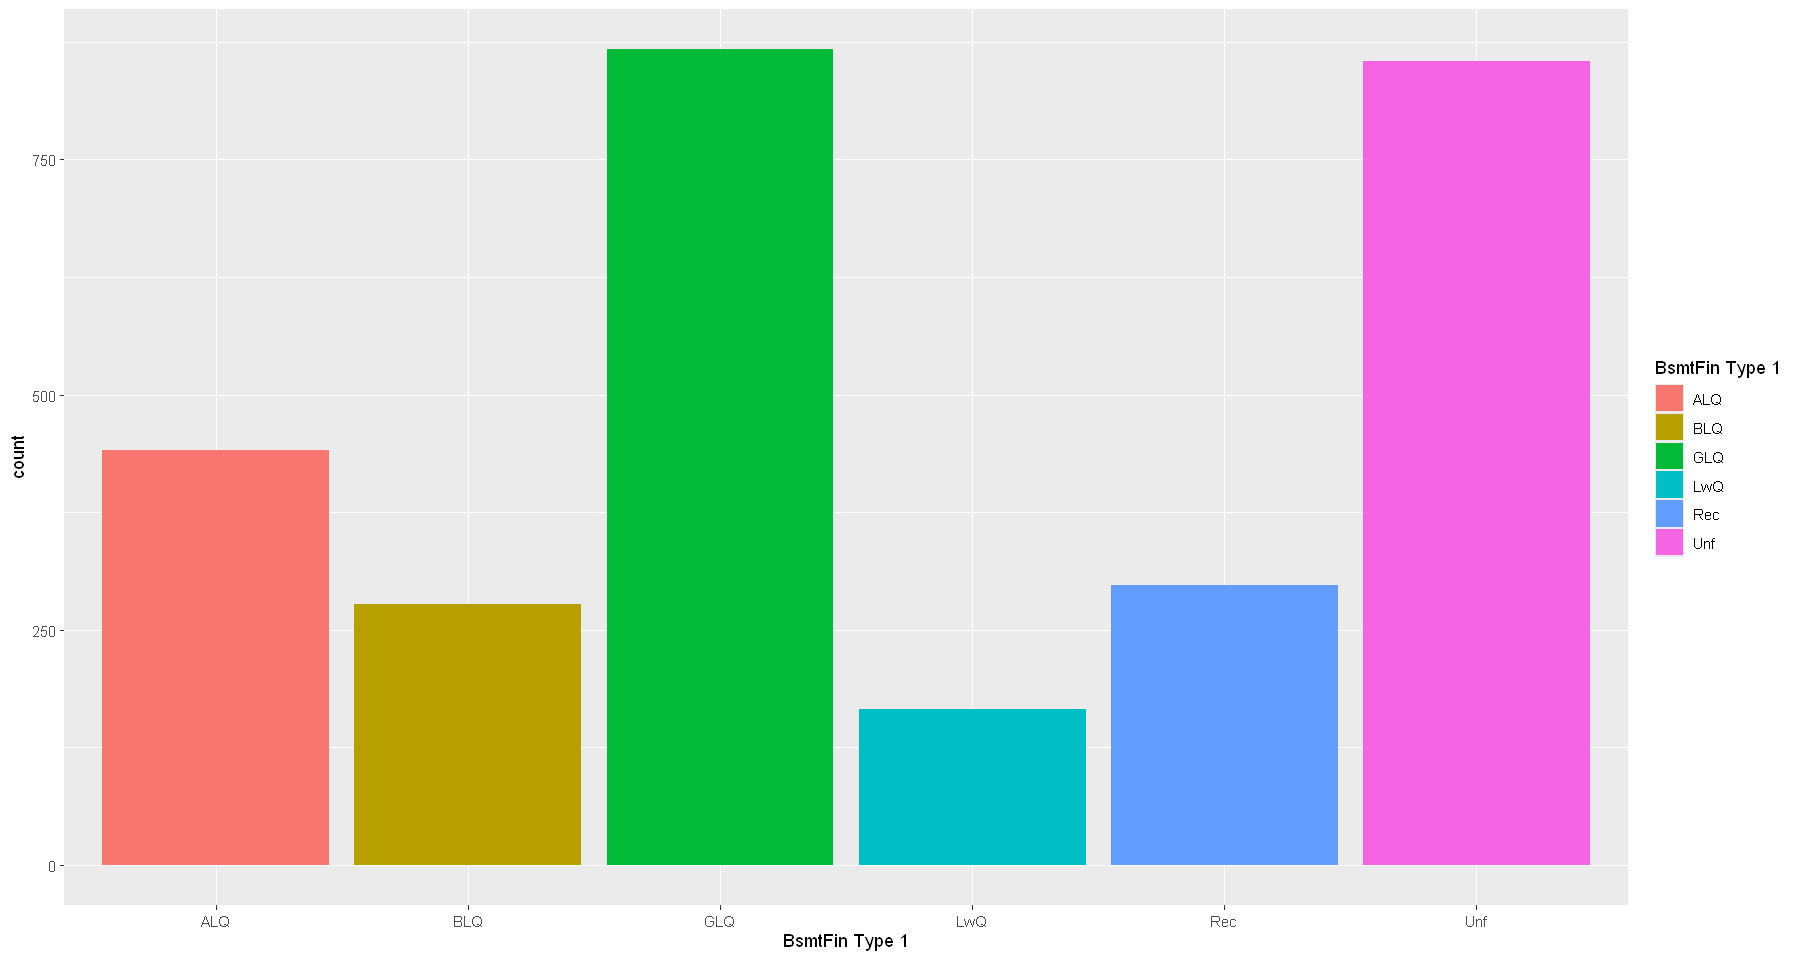

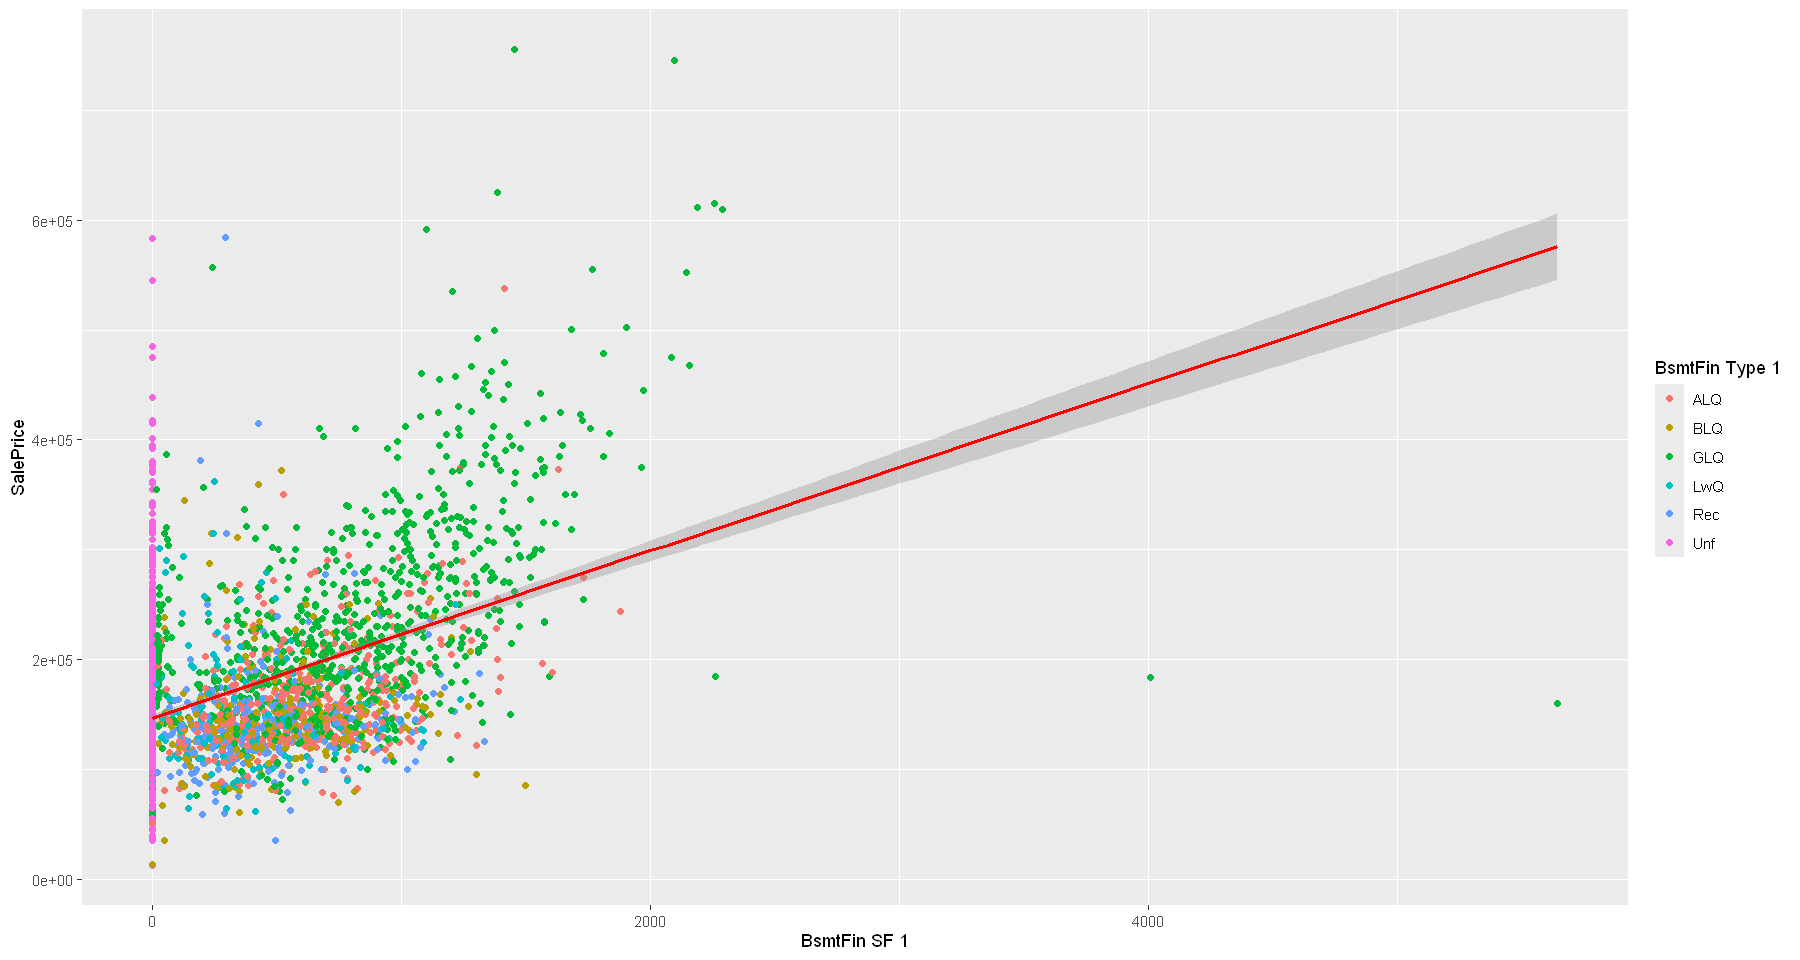

`geom_smooth()` using formula = 'y ~ x'


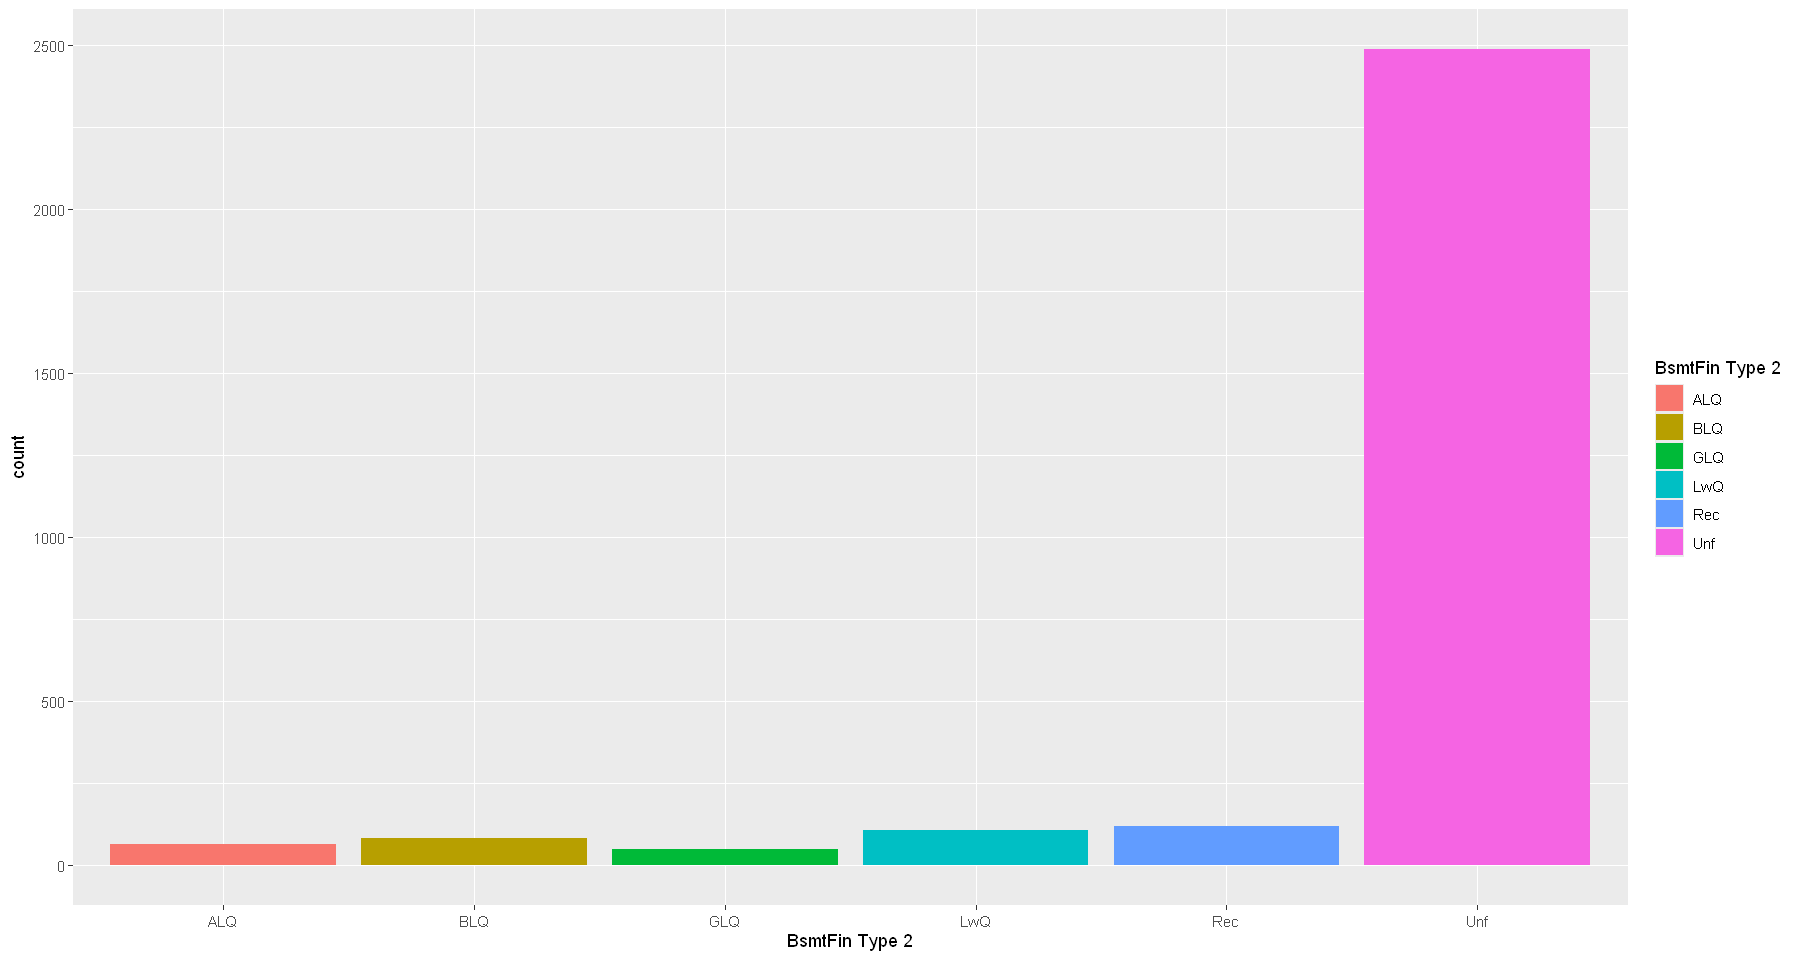

[1] 0.4167624

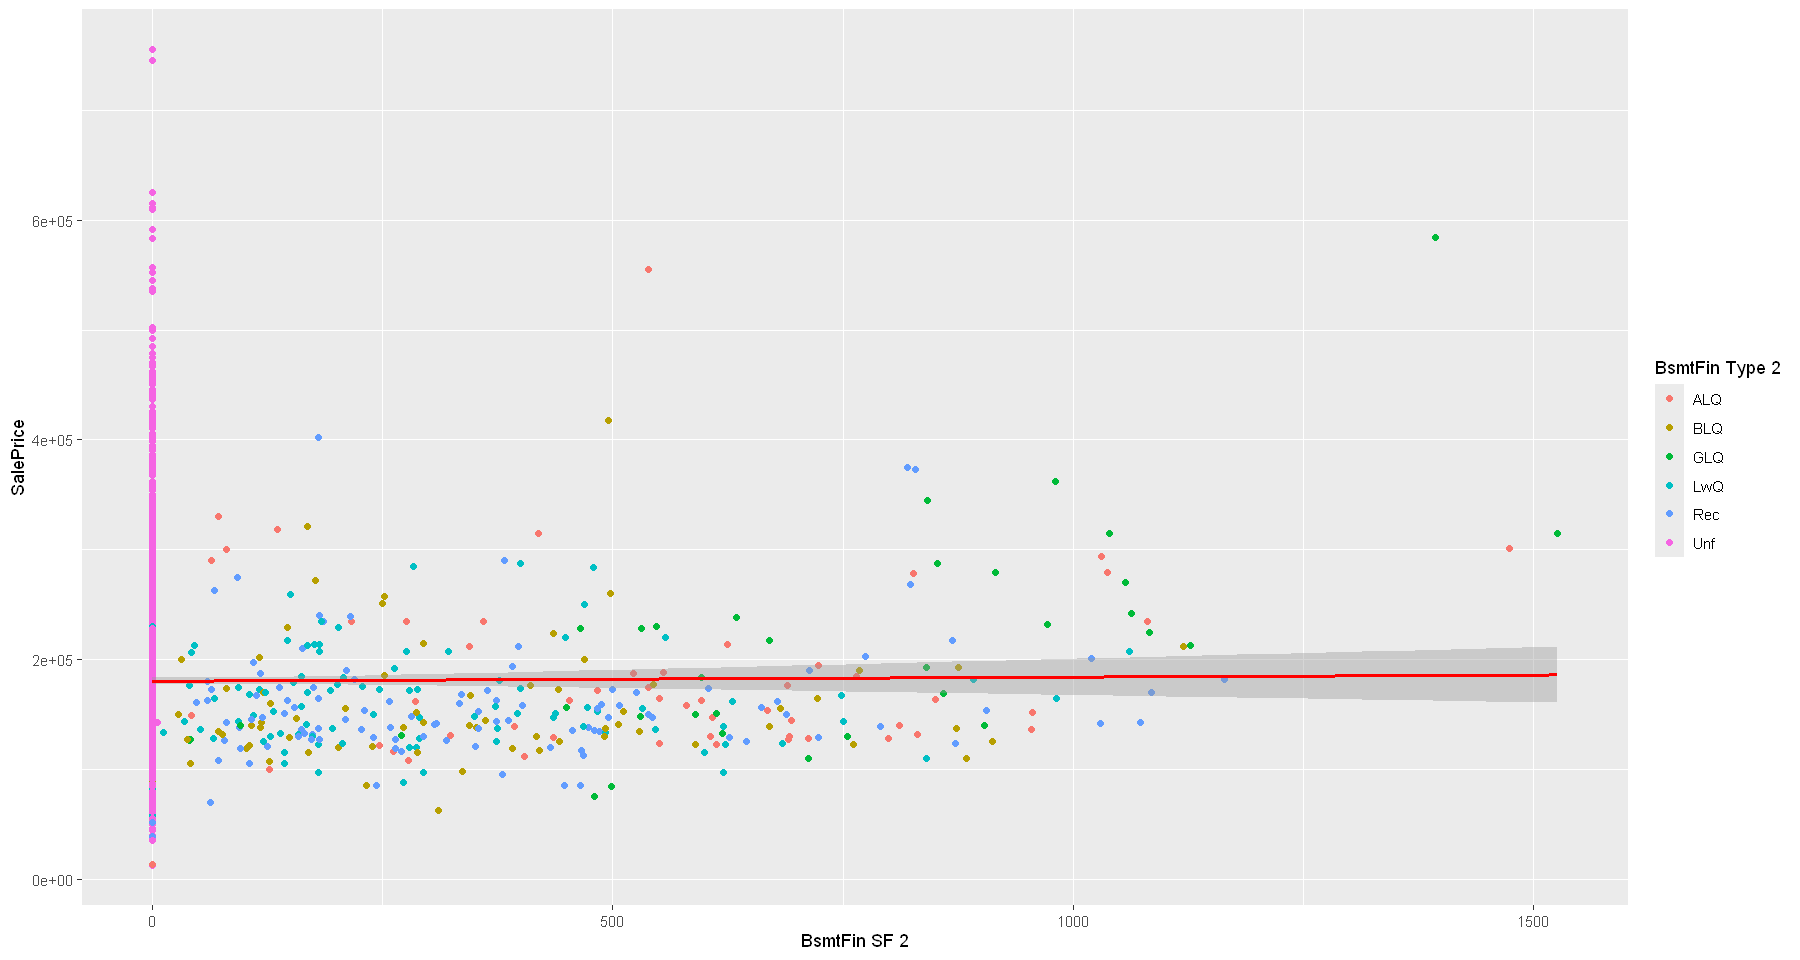

In [102]:
# price v/s basement
ggplot(AmesHousing,aes(x = `Total Bsmt SF`,y = SalePrice))+
  geom_point(color = "green",size = 6)+
  geom_smooth(method = "lm",color = "violet")+
  labs(x = "Total BSMT Area(sq.ft)",y = "Sale Price",
       title = "Sale Price v/s Basement Area")

ggplot(AmesHousing,aes(x = `BsmtFin Type 1`,fill = `BsmtFin Type 1`))+
  geom_bar()
ggplot(AmesHousing,aes(x = `BsmtFin SF 1`,y = SalePrice,color = `BsmtFin Type 1`))+
  geom_point()+
  geom_smooth(method = "lm",color = "red")

ggplot(AmesHousing,aes(x = `BsmtFin Type 2`,fill = `BsmtFin Type 2`))+
  geom_bar()
ggplot(AmesHousing,aes(x = `BsmtFin SF 2`,y = SalePrice,color = `BsmtFin Type 2`))+
  geom_point()+
  geom_smooth(method = "lm",color = "red") # does not have an impact

AmesHousing$Net_Bsmt <- AmesHousing$`Total Bsmt SF` - AmesHousing$`Bsmt Unf SF`
cor(AmesHousing$SalePrice,AmesHousing$Net_Bsmt)

`geom_smooth()` using formula = 'y ~ x'


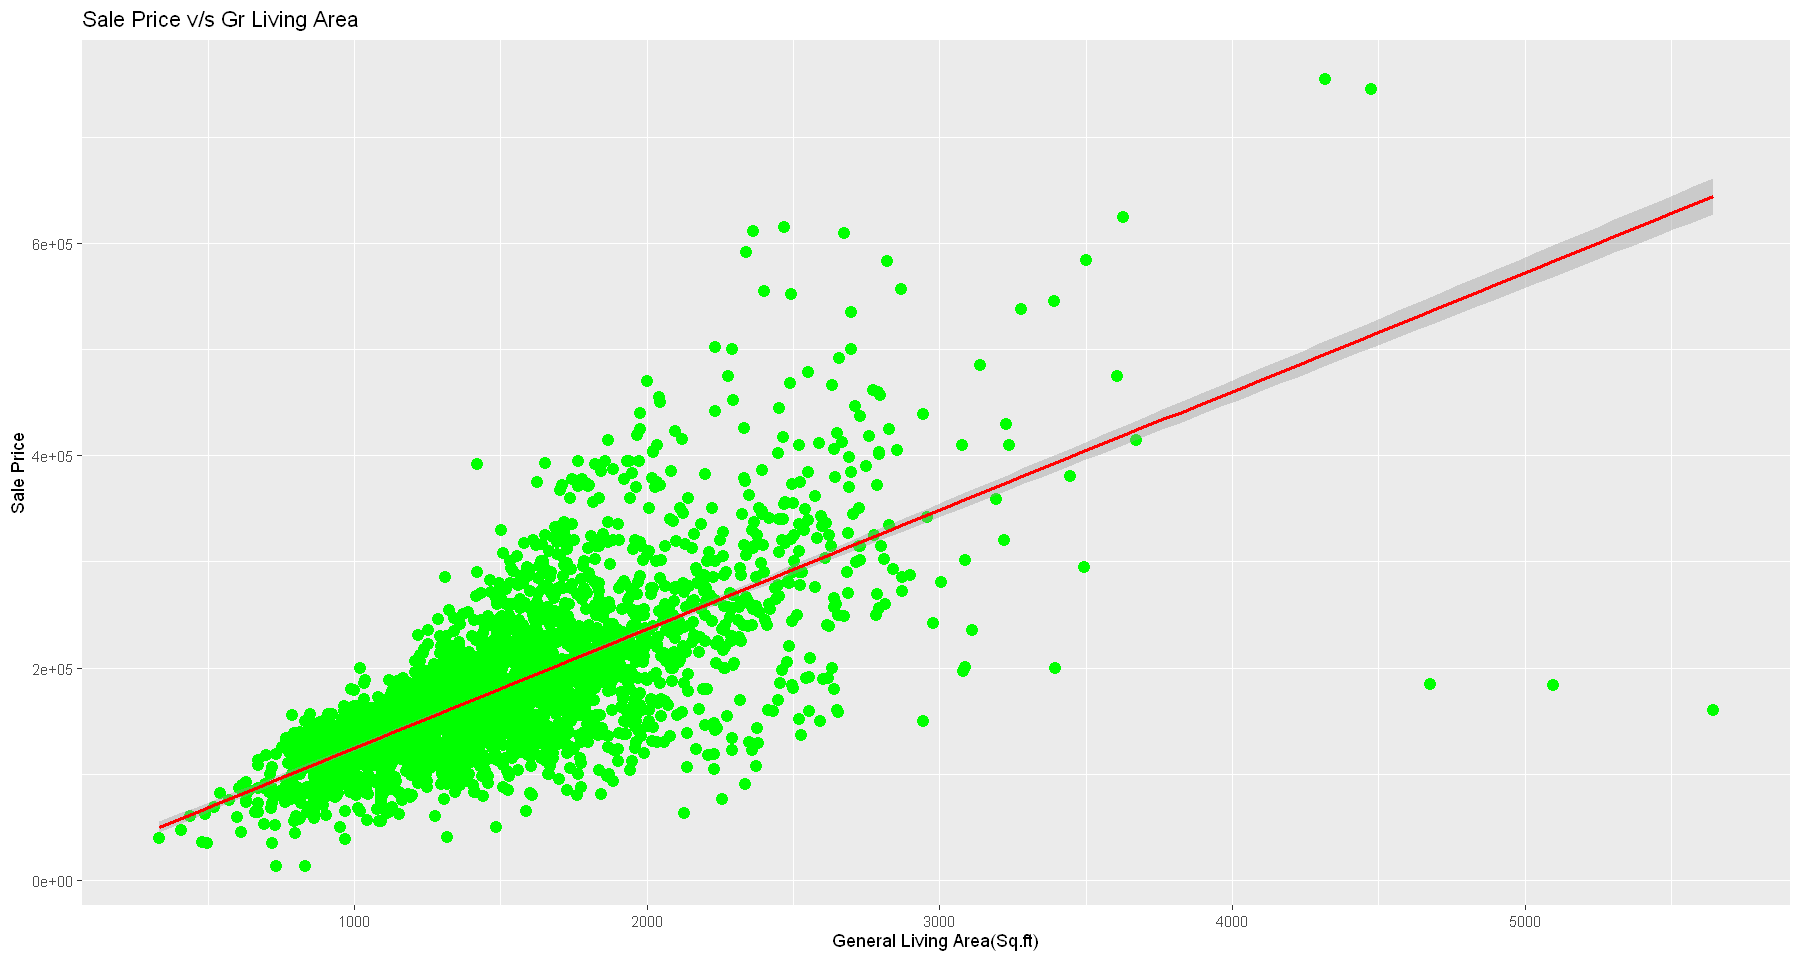

In [106]:
# price v/s living areas
ggplot(AmesHousing,aes(x = `Gr Liv Area`,y = SalePrice))+
  geom_point(color = "green",size = 3)+
  geom_smooth(method = "lm",color = "red") +
  labs(x = "General Living Area(Sq.ft)",y = "Sale Price",
       title = "Sale Price v/s Gr Living Area")

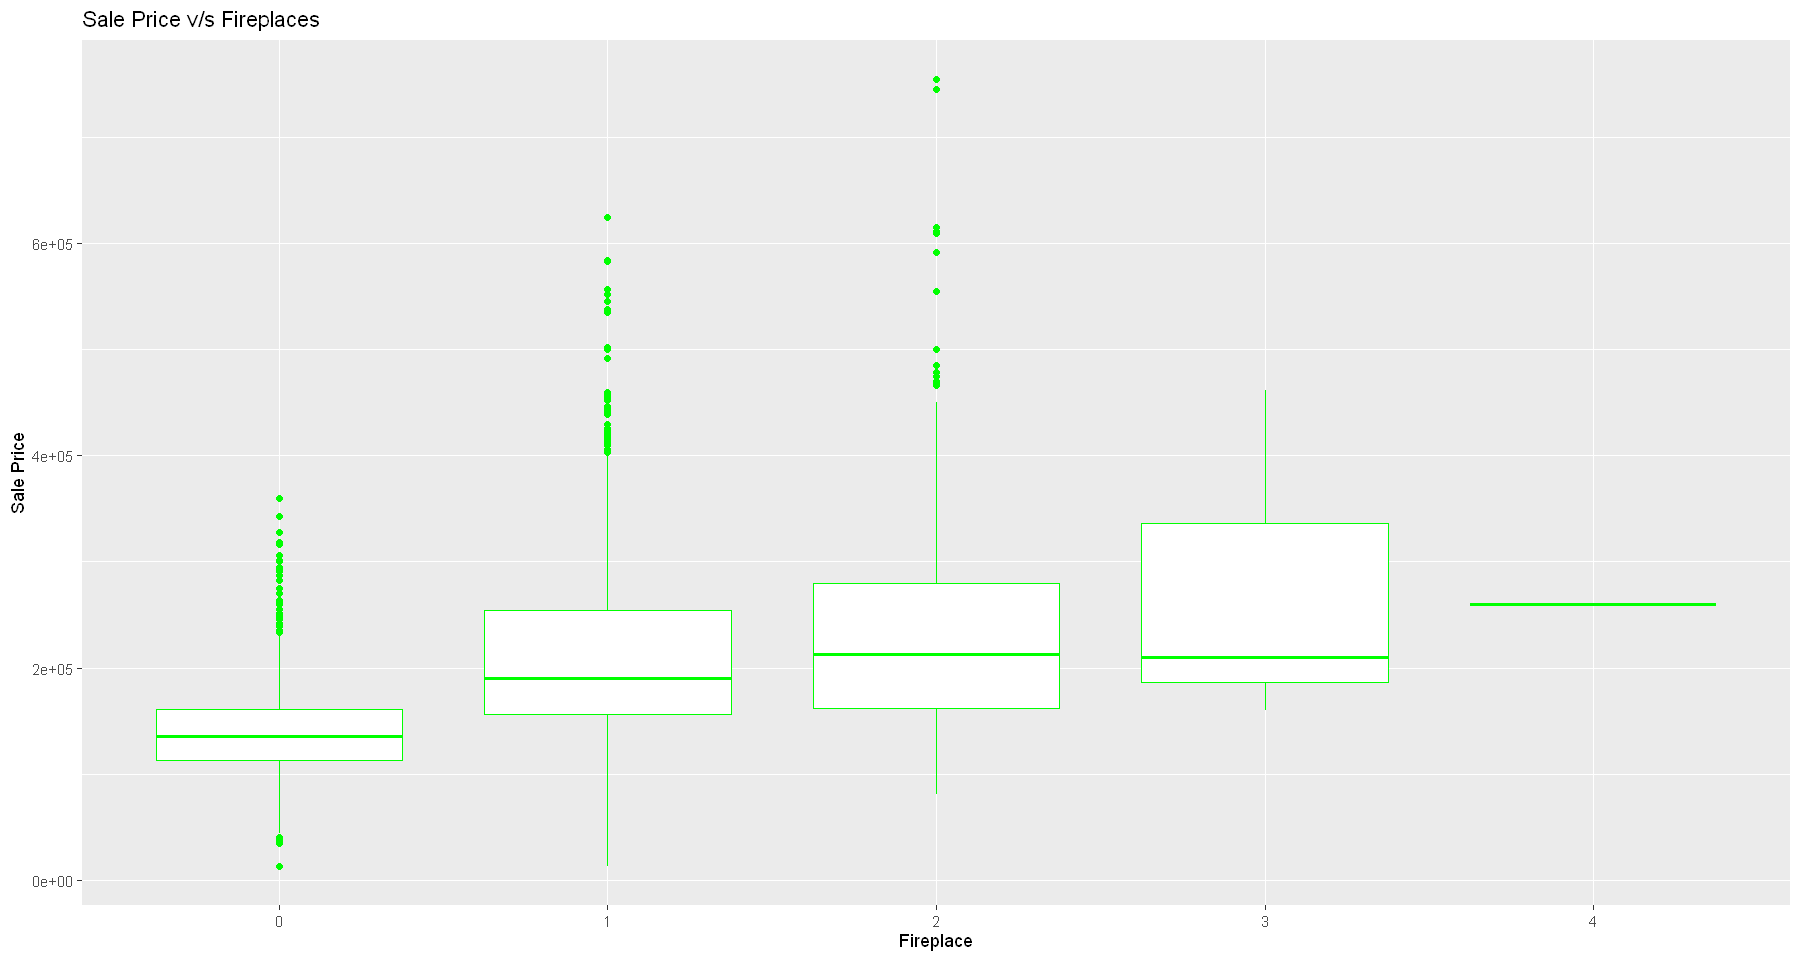

In [108]:
# price v/s fireplaces
ggplot(AmesHousing,aes(x = as.factor(Fireplaces),y = SalePrice))+
  geom_boxplot(color = "green")+
  labs(x = "Fireplace",y = "Sale Price",
       title = "Sale Price v/s Fireplaces")

`geom_smooth()` using formula = 'y ~ x'


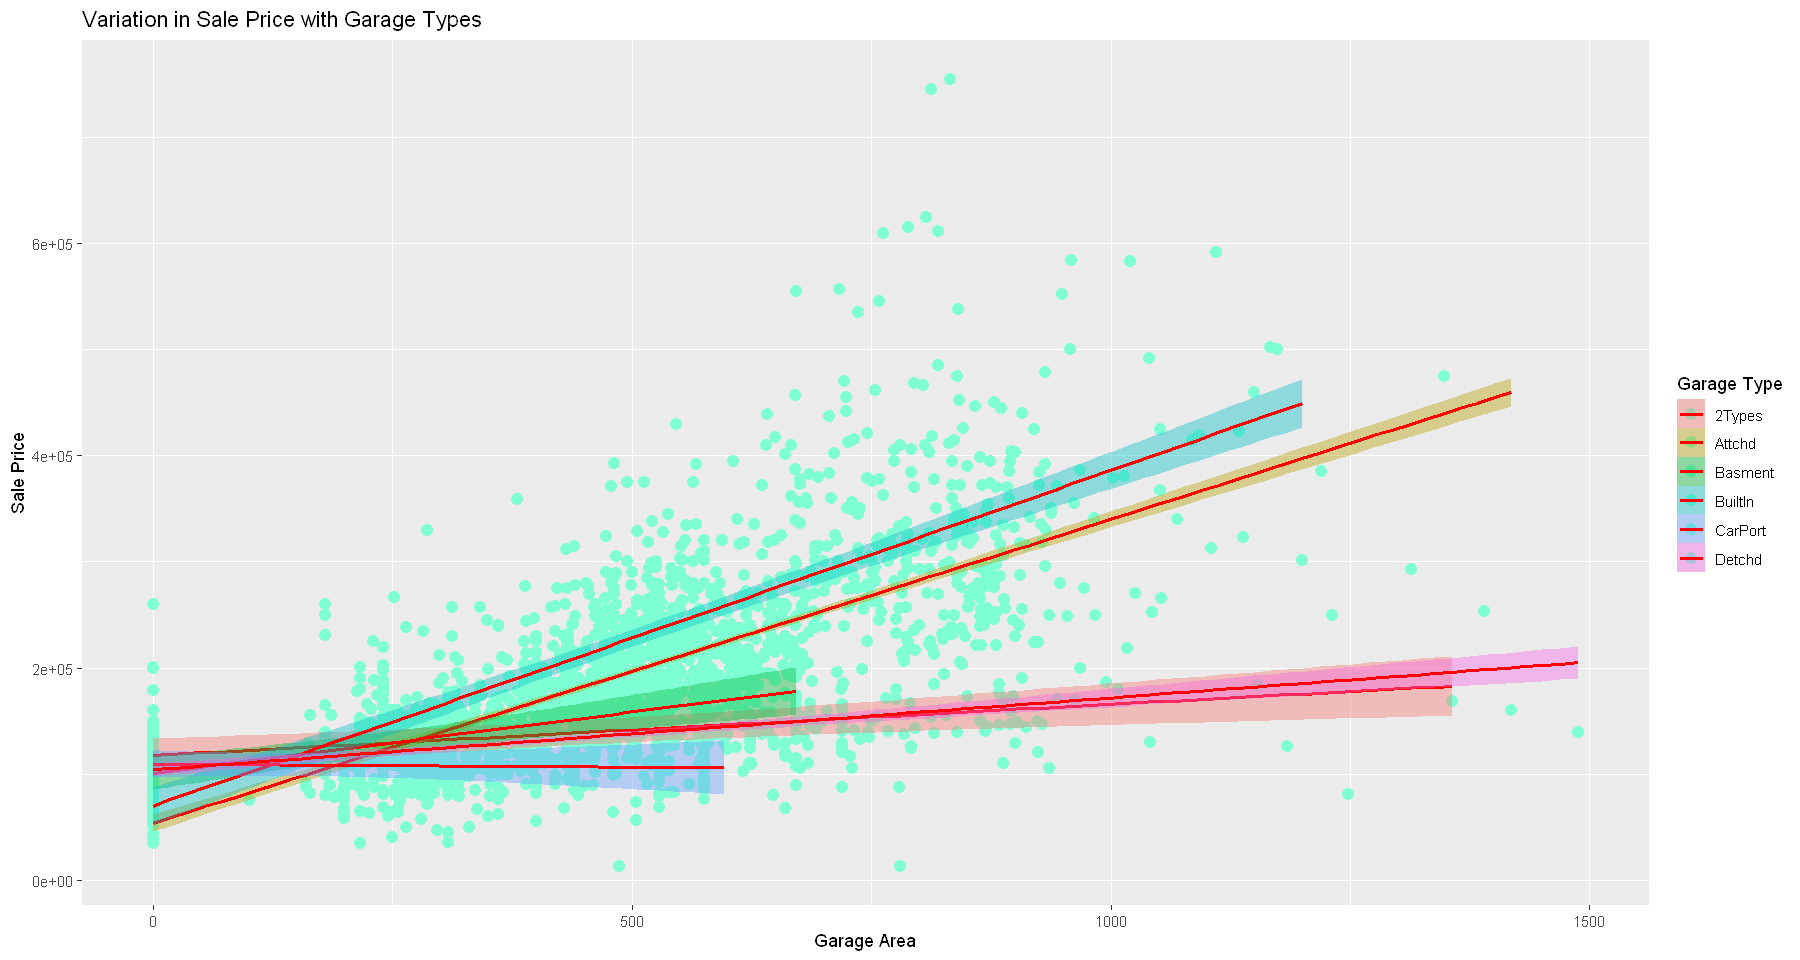

In [114]:
# price v/s garage
ggplot(AmesHousing,aes(x = `Garage Area`,y = SalePrice,fill = `Garage Type`))+
  geom_point(color = "aquamarine",size = 3)+
  geom_smooth(method = "lm",color = "red")+
  labs(x = "Garage Area",y = "Sale Price",
       title = "Variation in Sale Price with Garage Types")

`geom_smooth()` using formula = 'y ~ x'


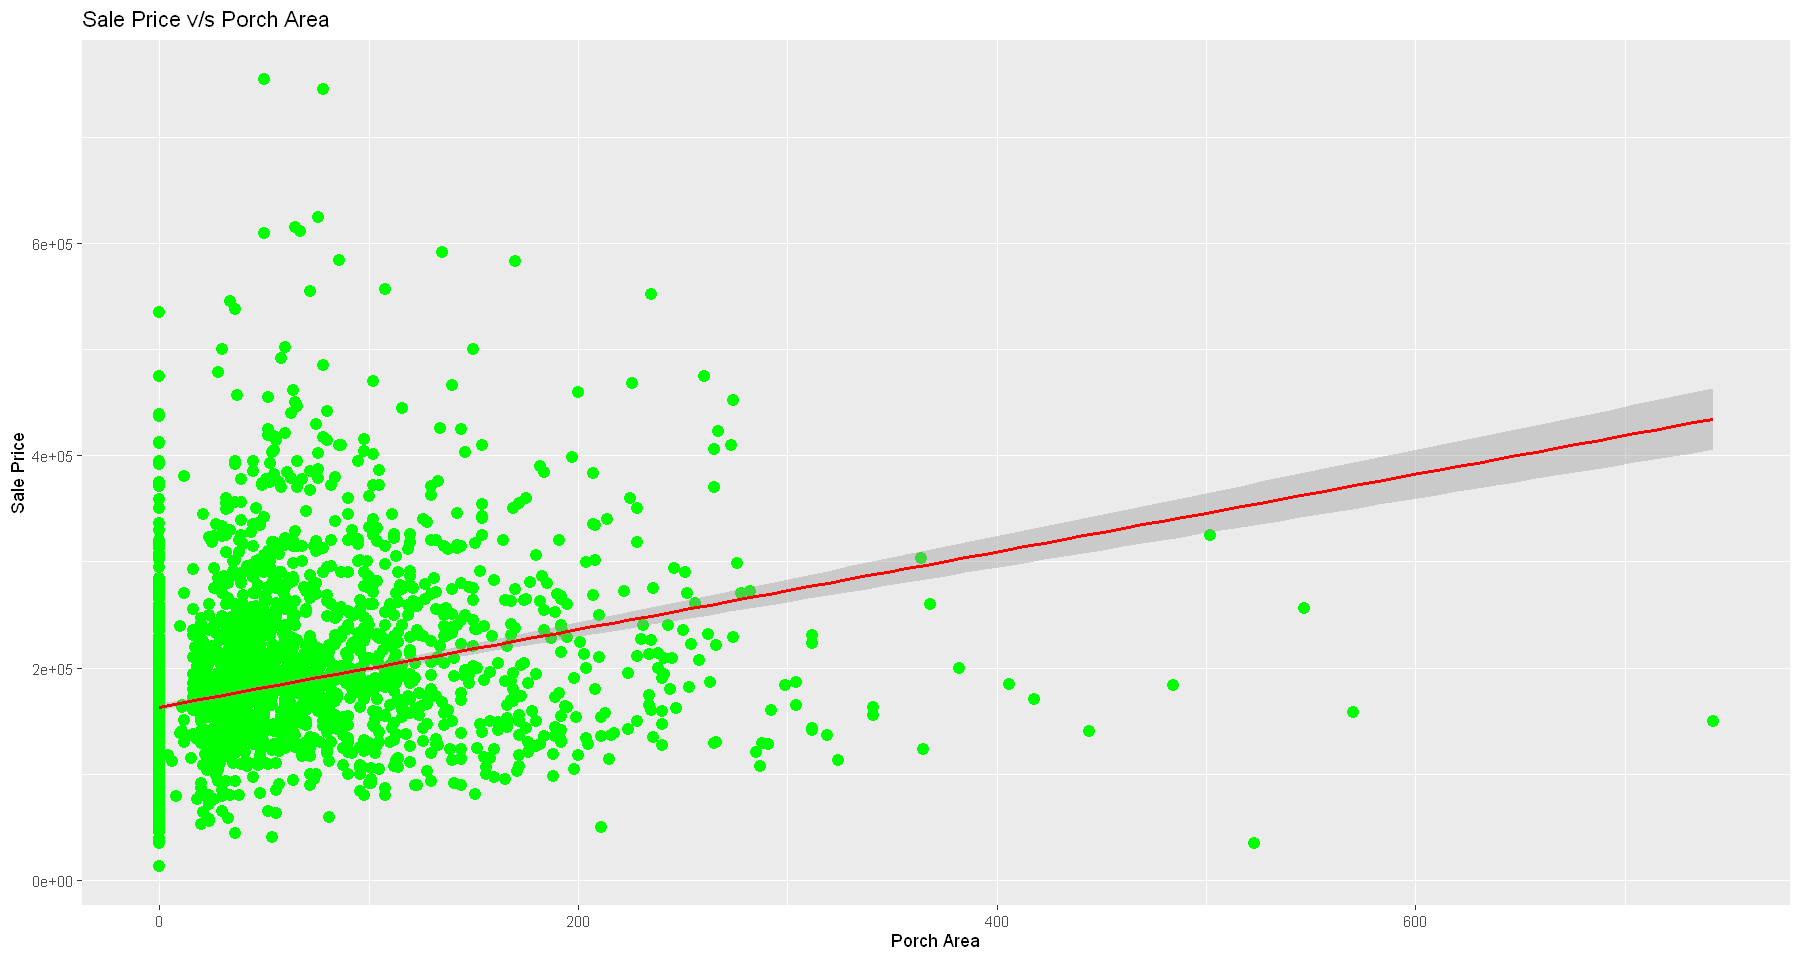

In [118]:
# price v/s porch
ggplot(AmesHousing,aes(x = `Open Porch SF`,y = SalePrice))+
  geom_point(color = "green",size = 3)+
  geom_smooth(method = "lm",color = "red")+
  labs(x = "Porch Area",y = "Sale Price",
       title = "Sale Price v/s Porch Area")

## Feature Engineering

In [121]:
# Generate Dummy Variables (One-hot encoding)
dummy_vars <- dummyVars(~ ., data = AmesHousing)
AmesHousing_encoded <- predict(dummy_vars, newdata = AmesHousing)
AmesHousing_encoded <- as.data.frame(AmesHousing_encoded)

# Generate Dummy Variables (One-hot encoding) for Outlier treated
dummy_vars_outlier <- dummyVars(~ ., data = AmesHousing_clean)
AmesHousing_encoded_outlier <- predict(dummy_vars_outlier, newdata = AmesHousing_clean)
AmesHousing_encoded_outlier <- as.data.frame(AmesHousing_encoded_outlier)

# Filter features with a significant correlation (e.g., above 0.3 or below -0.3)
cor_matrix <- cor(AmesHousing[sapply(AmesHousing, is.numeric)], use = "complete.obs")
significant_features <- names(cor_matrix[,"SalePrice"])[abs(cor_matrix[,"SalePrice"]) > 0.3]
significant_features <- setdiff(significant_features, "SalePrice")
filtered_data <- AmesHousing[, c(significant_features, "SalePrice")]
print(significant_features)  # View the selected features

 [1] "Lot Frontage"   "Overall Qual"   "Year Built"     "Year Remod/Add"
 [5] "Mas Vnr Area"   "BsmtFin SF 1"   "Total Bsmt SF"  "1st Flr SF"    
 [9] "Gr Liv Area"    "Full Bath"      "TotRms AbvGrd"  "Fireplaces"    
[13] "Garage Cars"    "Garage Area"    "Wood Deck SF"   "Open Porch SF" 
[17] "log_Scale"      "Age"            "Net_Bsmt"      


## Splitting the Dataset

In [124]:
set.seed(123)
# Considering complete dataset
index1 <- sample(1:nrow(AmesHousing), size = as.integer(0.7 * nrow(AmesHousing)))
train1 <- AmesHousing_encoded[index1,]
test1 <- AmesHousing_encoded[-index1,]

# Considering significant dataset
index2 <- sample(1:nrow(filtered_data), size = as.integer(0.7 * nrow(filtered_data)))
train2 <- filtered_data[index2,]
test2 <- filtered_data[-index2,]

# considering the dataset after the treatment of outliers
index3 <- sample(1:nrow(AmesHousing_clean), size = as.integer(0.7 * nrow(AmesHousing_clean)))
train3 <- AmesHousing_encoded_outlier[index3,]
test3 <- AmesHousing_encoded_outlier[-index3,]


## MODEL Training and Testing

In [127]:
# Model 1: Lasso Regression 
x_train <- as.matrix(train1[, -which(names(train1) == "SalePrice")])
y_train <- train1$SalePrice
model1 <- glmnet(x_train, y_train, alpha = 1)
pred1 <- predict(model1, newx = as.matrix(test1[, -which(names(test1) == "SalePrice")]), s = 0.1)
# Calculate R-squared
rss <- sum((pred1 - test1$SalePrice)^2) # Residual sum of squares
tss <- sum((test1$SalePrice - mean(test1$SalePrice))^2) # Total sum of squares
r_squared_1 <- 1 - (rss / tss) # R-squared
r_squared_1
# Calculate adjusted R-squared
n <- nrow(test1)  # Number of observations
p <- length(coef(model1, s = model1$lambda.min)) - 1  # Number of predictors (excluding the intercept)
adj_r_squared_1 <- 1 - ((1 - r_squared_1) * (n - 1)) / (n - p - 1) # Adjusted R-squared
adj_r_squared_1

# Model 2 : Linear Regression of Significant features
model2 <- lm(SalePrice ~ . ,data = train2)
summary(model2)
# Make predictions
pred2 <- predict(model2, newdata = test2)

# Model 3: Lasso Regression on Outlier removed data
x_Train <- as.matrix(train3[, -which(names(train3) == "SalePrice")])
y_Train <- train3$SalePrice
model3 <- glmnet(x_Train, y_Train, alpha = 1)
pred3<- predict(model3, newx = as.matrix(test3[, -which(names(test3) == "SalePrice")]), s = 0.1)
# Calculate R-squared
rss <- sum((pred3 - test3$SalePrice)^2) # Residual sum of squares
tss <- sum((test3$SalePrice - mean(test3$SalePrice))^2) # Total sum of squares
r_squared_3<- 1 - (rss / tss) # R-squared
r_squared_3
# Calculate adjusted R-squared
n <- nrow(test3)  # Number of observations
p <- length(coef(model3, s = model3$lambda.min)) - 1  # Number of predictors (excluding the intercept)

adj_r_squared_3 <- 1 - ((1 - r_squared_3) * (n - 1)) / (n - p - 1) # Adjusted R-squared
adj_r_squared_3

[1] 0.9495834

[1] 1.001679


Call:
lm(formula = SalePrice ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-200558  -11285   -4208    4560  228712 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.777e+06  7.773e+05  -2.286 0.022363 *  
`Lot Frontage`    6.437e+01  2.776e+01   2.319 0.020495 *  
`Overall Qual`    4.642e+03  6.820e+02   6.807 1.31e-11 ***
`Year Built`      6.469e+01  3.880e+02   0.167 0.867588    
`Year Remod/Add`  5.138e+01  3.474e+01   1.479 0.139306    
`Mas Vnr Area`    3.388e+01  3.248e+00  10.431  < 2e-16 ***
`BsmtFin SF 1`    1.101e+01  3.252e+00   3.386 0.000723 ***
`Total Bsmt SF`   3.764e+00  2.233e+00   1.686 0.091990 .  
`1st Flr SF`      4.476e+00  2.483e+00   1.802 0.071671 .  
`Gr Liv Area`     1.804e+01  2.537e+00   7.113 1.57e-12 ***
`Full Bath`      -3.017e+03  1.377e+03  -2.191 0.028551 *  
`TotRms AbvGrd`  -1.011e+03  5.846e+02  -1.729 0.083980 .  
Fireplaces       -1.238e+03  9.637e+02  -1.285 0.198974    
`

[1] 0.9600406

[1] 1.001209

## Model Evaluation

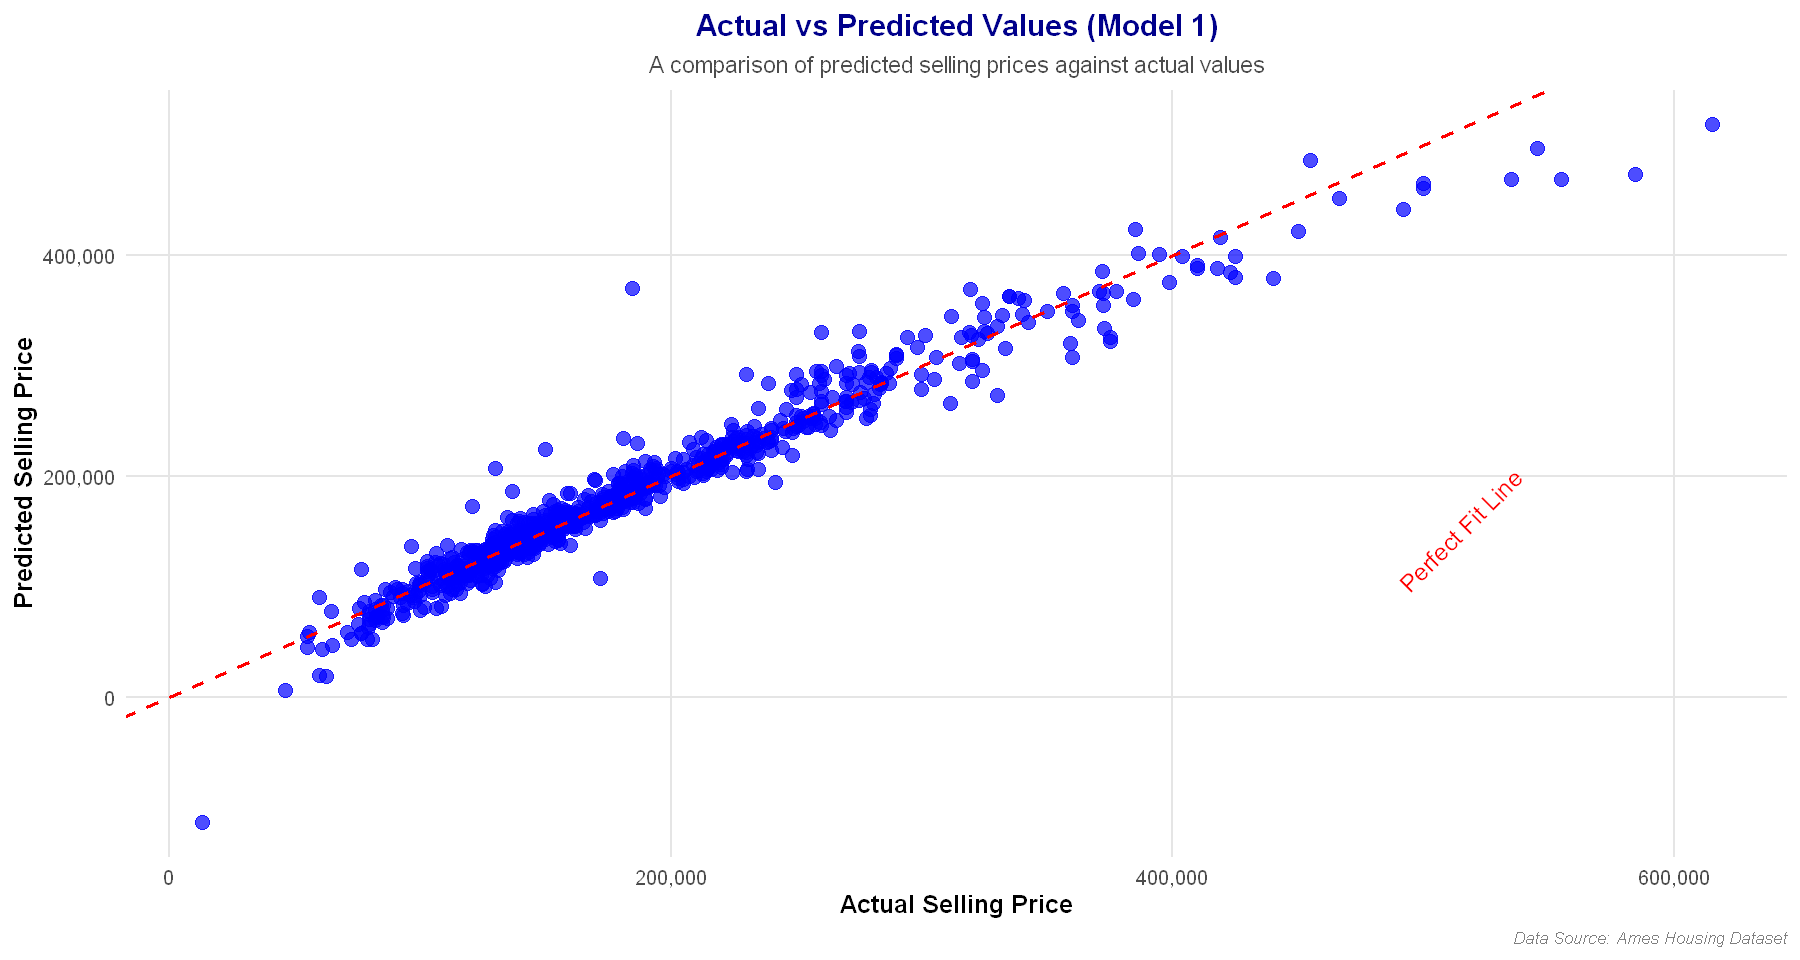

In [132]:
library(ggplot2)

ggplot() +
  geom_point(aes(x = test1$SalePrice, y = pred1), color = "blue", size = 4, alpha = 0.7) + # Larger points with transparency
  geom_abline(slope = 1, intercept = 0, color = "red", size = 1, linetype = "dashed") + # Dashed line for better visibility
  labs(
    title = "Actual vs Predicted Values (Model 1)",
    subtitle = "A comparison of predicted selling prices against actual values",
    x = "Actual Selling Price",
    y = "Predicted Selling Price",
    caption = "Data Source: Ames Housing Dataset"
  ) +
  theme_minimal(base_size = 15) + # Clean, minimal theme with larger font size
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "gray50"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    panel.grid.major = element_line(color = "gray90"), # Light grid lines
    panel.grid.minor = element_blank() # Remove minor grid lines
  ) +
  scale_x_continuous(labels = scales::comma) + # Format x-axis with commas
  scale_y_continuous(labels = scales::comma) + # Format y-axis with commas
  annotate(
    "text", x = max(test3$SalePrice) * 0.8, y = max(pred3) * 0.2,
    label = "Perfect Fit Line", color = "red", angle = 45, hjust = 0, size = 5
  ) # Add annotation for the abline


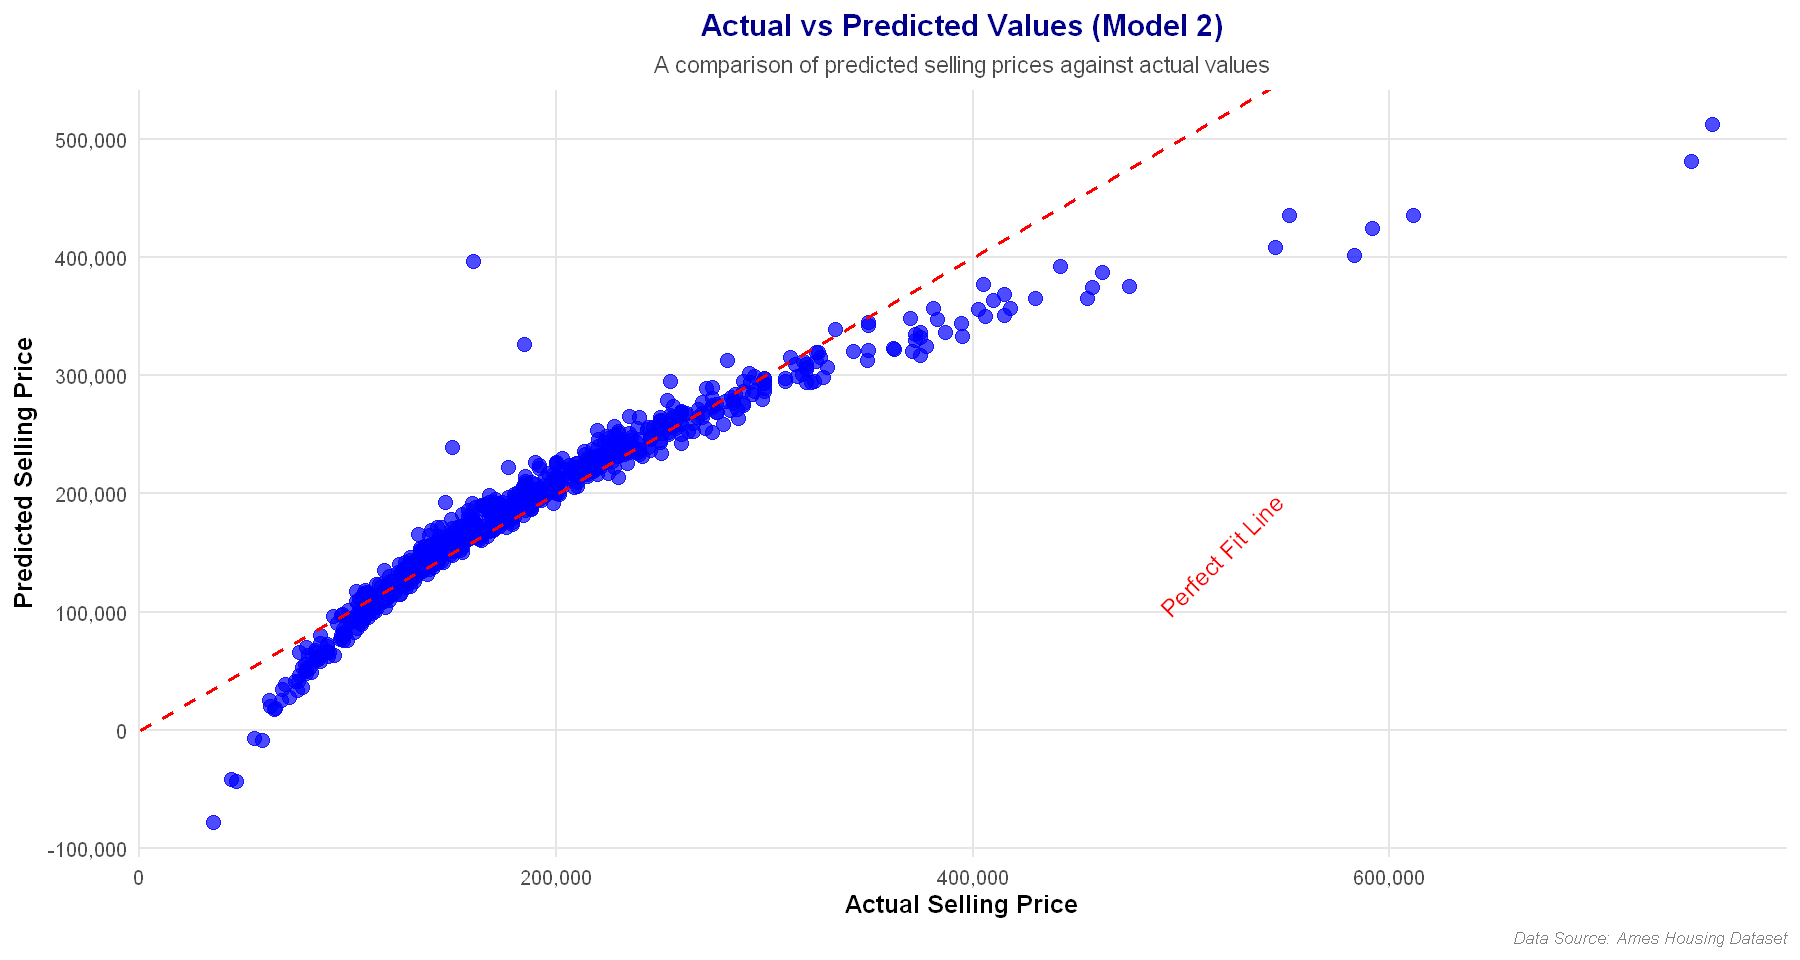

In [134]:
ggplot() +
  geom_point(aes(x = test2$SalePrice, y = pred2), color = "blue", size = 4, alpha = 0.7) + # Larger points with transparency
  geom_abline(slope = 1, intercept = 0, color = "red", size = 1, linetype = "dashed") + # Dashed line for better visibility
  labs(
    title = "Actual vs Predicted Values (Model 2)",
    subtitle = "A comparison of predicted selling prices against actual values",
    x = "Actual Selling Price",
    y = "Predicted Selling Price",
    caption = "Data Source: Ames Housing Dataset"
  ) +
  theme_minimal(base_size = 15) + # Clean, minimal theme with larger font size
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "gray50"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    panel.grid.major = element_line(color = "gray90"), # Light grid lines
    panel.grid.minor = element_blank() # Remove minor grid lines
  ) +
  scale_x_continuous(labels = scales::comma) + # Format x-axis with commas
  scale_y_continuous(labels = scales::comma) + # Format y-axis with commas
  annotate(
    "text", x = max(test3$SalePrice) * 0.8, y = max(pred3) * 0.2,
    label = "Perfect Fit Line", color = "red", angle = 45, hjust = 0, size = 5
  ) # Add annotation for the abline

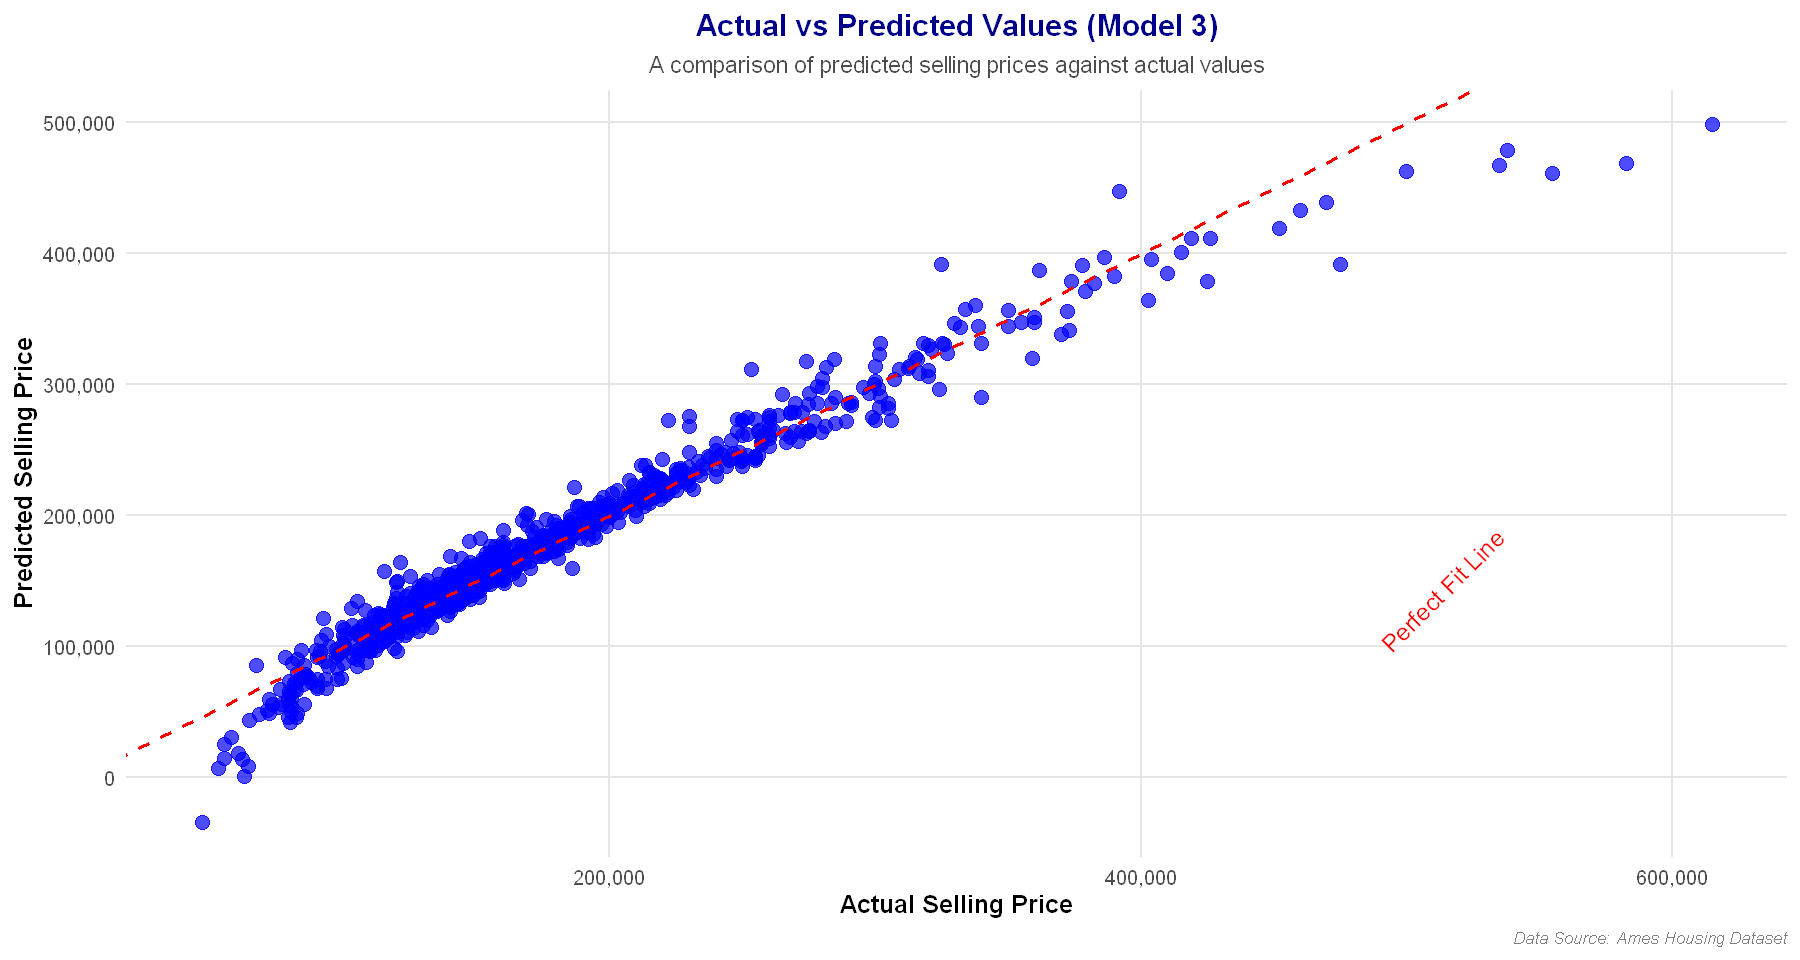

In [138]:
ggplot() +
  geom_point(aes(x = test3$SalePrice, y = pred3), color = "blue", size = 4, alpha = 0.7) + # Larger points with transparency
  geom_abline(slope = 1, intercept = 0, color = "red", size = 1, linetype = "dashed") + # Dashed line for better visibility
  labs(
    title = "Actual vs Predicted Values (Model 3)",
    subtitle = "A comparison of predicted selling prices against actual values",
    x = "Actual Selling Price",
    y = "Predicted Selling Price",
    caption = "Data Source: Ames Housing Dataset"
  ) +
  theme_minimal(base_size = 15) + # Clean, minimal theme with larger font size
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "gray50"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    panel.grid.major = element_line(color = "gray90"), # Light grid lines
    panel.grid.minor = element_blank() # Remove minor grid lines
  ) +
  scale_x_continuous(labels = scales::comma) + # Format x-axis with commas
  scale_y_continuous(labels = scales::comma) + # Format y-axis with commas
  annotate(
    "text", x = max(test3$SalePrice) * 0.8, y = max(pred3) * 0.2,
    label = "Perfect Fit Line", color = "red", angle = 45, hjust = 0, size = 5
  ) # Add annotation for the abline


In [140]:
# Function to calculate performance metrics
calculate_metrics <- function(actual, predicted) {
  mse <- mean((actual - predicted)^2) # Mean Squared Error
  rmse <- sqrt(mse)                   # Root Mean Squared Error
  bias <- mean(predicted - actual)    # Bias
  rss <- sum((predicted - actual)^2)  # Residual Sum of Squares
  tss <- sum((actual - mean(actual))^2) # Total Sum of Squares
  r_squared <- 1 - (rss / tss)        # R-squared
  correlation <- cor(actual, predicted) # Correlation
  
  return(list(
    MSE = mse,
    RMSE = rmse,
    Bias = bias,
    R_Squared = r_squared,
    Correlation = correlation
  ))
}

# Calculate metrics for each model
metrics1 <- calculate_metrics(test1$SalePrice, pred1)
metrics2 <- calculate_metrics(test2$SalePrice, pred2)
metrics3 <- calculate_metrics(test3$SalePrice, pred3)
# Combine metrics into a data frame
metrics_df <- data.frame(
  Model = c("Model 1", 
            "Model 2", 
            "Model 3"),
  MSE = c(metrics1$MSE, metrics2$MSE, metrics3$MSE),
  RMSE = c(metrics1$RMSE, metrics2$RMSE, metrics3$RMSE),
  Bias = c(metrics1$Bias, metrics2$Bias, metrics3$Bias),
  R_Squared = c(metrics1$R_Squared, metrics2$R_Squared, metrics3$R_Squared),
  Correlation = c(metrics1$Correlation, metrics2$Correlation, metrics3$Correlation)
)

# Print the combined metrics
print(metrics_df)


    Model       MSE     RMSE      Bias R_Squared Correlation
1 Model 1 318922760 17858.41 157.54220 0.9495834   0.9745336
2 Model 2 696687359 26394.84 -76.53495 0.8963698   0.9476426
3 Model 3 241243508 15532.02 164.75223 0.9600406   0.9799033
